In [ ]:
import os
from google.colab import drive

folder_mount = '/content/drive' 
drive.mount(folder_mount)
os.chdir("/content/drive/MyDrive/DSSC/NLP/FinalProject")
print(os.getcwd())
%ls

Mounted at /content/drive
/content/drive/MyDrive/DSSC/NLP/FinalProject
FinalProject.ipynb                       sanitized_liberal_df_stem_coll.pkl
liberalsVSconservatives.csv              X_SMOTE.pkl
sanitized_conservative_df.pkl            X_test_SMOTE.pkl
sanitized_conservative_df_stem_coll.pkl  X_train_SMOTE.pkl
sanitized_df.pkl                         y_SMOTE.pkl
sanitized_df_stem_colloc.pkl             y_test_SMOTE.pkl
sanitized_liberal_df.pkl                 y_train_SMOTE.pkl


In [ ]:
import numpy as np
import pandas as pd 
import pickle

In [ ]:
df = pd.read_csv("liberalsVSconservatives.csv")
df

Title Political Lean  \
0      No matter who someone is, how they look like, ...        Liberal   
1        Biden speech draws 38.2 million U.S. TV viewers        Liberal   
2                                     State of the union        Liberal   
3                  We Should Just Give Poor People Money        Liberal   
4                                      Do it for the Dew        Liberal   
...                                                  ...            ...   
12849  Ron Paul’s Spirited Defense of WikiLeaks & Fre...   Conservative   
12850  “Anarcho-capitalism, in my opinion, is a doctr...   Conservative   
12851  Mises Wiki is a wiki project dedicated to the ...   Conservative   
12852  Fireman Protection Monopoly - Is This Failed C...   Conservative   
12853      Can this Wikipedia Article be Better Written?   Conservative   

       Score      Id            Subreddit  \
0          1  t5fybt            socialism   
1          6  t5fqdn            democrats   
2          1  t5fj9a  DemocraticSocialism   
3          7  t5f7n9      SocialDemocracy   
4          6  t5es2c            democrats   
...      ...     ...                  ...   
12849      2   em7rm    anarchocapitalism   
12850      2   ei98o    anarchocapitalism   
12851      2   e6x22    anarchocapitalism   
12852      2   e4vtd    anarchocapitalism   
12853      2   e00j6    anarchocapitalism   

                                                     URL  Num of Comments  \
0                        https://v.redd.it/ng5fyl7hp2l81                0   
1      https://www.reuters.com/world/us/biden-speech-...                1   
2      https://www.reddit.com/r/DemocraticSocialism/c...                1   
3                           https://youtu.be/a80kRjpubG0                3   
4                    https://i.redd.it/drmunn90f2l81.jpg                1   
...                                                  ...              ...   
12849  http://www.deathandtaxesmag.com/40485/ron-paul...                1   
12850  http://www.pressaction.com/news/weblog/full_ar...                1   
12851               http://wiki.mises.org/wiki/Main_Page                0   
12852  http://www.csmonitor.com/Business/Mises-Econom...                0   
12853  https://www.reddit.com/r/anarchocapitalism/com...                0   

                                                    Text  Date Created  
0                                                    NaN  1.646272e+09  
1                                                    NaN  1.646271e+09  
2      Who watched the state of the union last night ...  1.646270e+09  
3                                                    NaN  1.646270e+09  
4                                                    NaN  1.646268e+09  
...                                                  ...           ...  
12849                                                NaN  1.292421e+09  
12850                                                NaN  1.291813e+09  
12851                                                NaN  1.289910e+09  
12852                                                NaN  1.289524e+09  
12853  I go to the mises.org and listen to the writin...  1.288702e+09  

[12854 rows x 9 columns]

# EDA

In [ ]:
print(df['Date Created'][0])
print(df['Date Created'][1])
print(df['Date Created'][2])
print(df['Date Created'][3])

1646271777.0
1646271108.0
1646270488.0
1646269508.0


In [ ]:
!pip install emoji

import spacy 
import emoji 
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

import plotly.express as px

from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder, BigramAssocMeasures, TrigramAssocMeasures
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.decomposition import TruncatedSVD, NMF

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 5.0 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=6612878d877f54c985837cf2d979c6c74f4baae8aff2ca3b4460cfbce482fab1
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


## Studying Raw Dataset

In [ ]:
df.columns

Index(['Title', 'Political Lean', 'Score', 'Id', 'Subreddit', 'URL',
       'Num of Comments', 'Text', 'Date Created'],
      dtype='object')

In [ ]:
len(df)

12854

In [ ]:
df.dtypes

Title               object
Political Lean      object
Score                int64
Id                  object
Subreddit           object
URL                 object
Num of Comments      int64
Text                object
Date Created       float64
dtype: object

In [ ]:
df['Text'][2]

'Who watched the state of the union last night and what was your opinion?'

In [ ]:
df['Subreddit'].unique()

array(['socialism', 'democrats', 'DemocraticSocialism', 'SocialDemocracy',
       'progressive', 'alltheleft', 'Liberal', 'feminisms', 'Communist',
       'RadicalFeminism', 'Libertarian', 'conservatives', 'Capitalism',
       'republicans', 'anarchocapitalism'], dtype=object)

In [ ]:
df['Political Lean'].unique()

array(['Liberal', 'Conservative'], dtype=object)

In [ ]:
Conservativedf = df[df['Political Lean'] == 'Conservative']
Conservativedf

Title Political Lean  \
8319        Russia receives Venezuela's 'strong support'   Conservative   
8320   SOTU Rebuttal: Rashida Tlaib Calls Biden Out f...   Conservative   
8321   [BREAKING] Pfizer vaccine data released. 1291 ...   Conservative   
8322   Biden's first State of the Union address in 67...   Conservative   
8323   'The Crime Was Too Serious': Hunter Biden Asso...   Conservative   
...                                                  ...            ...   
12849  Ron Paul’s Spirited Defense of WikiLeaks & Fre...   Conservative   
12850  “Anarcho-capitalism, in my opinion, is a doctr...   Conservative   
12851  Mises Wiki is a wiki project dedicated to the ...   Conservative   
12852  Fireman Protection Monopoly - Is This Failed C...   Conservative   
12853      Can this Wikipedia Article be Better Written?   Conservative   

       Score      Id          Subreddit  \
8319       2  t4ugu4        Libertarian   
8320       1  t4uejr      conservatives   
8321       2  t4nu7o      conservatives   
8322       1  t4u68d      conservatives   
8323       1  t4u4v5      conservatives   
...      ...     ...                ...   
12849      2   em7rm  anarchocapitalism   
12850      2   ei98o  anarchocapitalism   
12851      2   e6x22  anarchocapitalism   
12852      2   e4vtd  anarchocapitalism   
12853      2   e00j6  anarchocapitalism   

                                                     URL  Num of Comments  \
8319   https://www.france24.com/en/live-news/20220301...                0   
8320   https://www.breitbart.com/politics/2022/03/01/...                0   
8321   /r/conspiracy/comments/t4lgbc/breaking_pfizer_...                0   
8322   https://twitter.com/kylenabecker/status/149889...                0   
8323   https://conservativebrief.com/hunter-biden-60660/                0   
...                                                  ...              ...   
12849  http://www.deathandtaxesmag.com/40485/ron-paul...                1   
12850  http://www.pressaction.com/news/weblog/full_ar...                1   
12851               http://wiki.mises.org/wiki/Main_Page                0   
12852  http://www.csmonitor.com/Business/Mises-Econom...                0   
12853  https://www.reddit.com/r/anarchocapitalism/com...                0   

                                                    Text  Date Created  
8319                                                 NaN  1.646205e+09  
8320                                                 NaN  1.646205e+09  
8321                                                 NaN  1.646184e+09  
8322                                                 NaN  1.646204e+09  
8323                                                 NaN  1.646204e+09  
...                                                  ...           ...  
12849                                                NaN  1.292421e+09  
12850                                                NaN  1.291813e+09  
12851                                                NaN  1.289910e+09  
12852                                                NaN  1.289524e+09  
12853  I go to the mises.org and listen to the writin...  1.288702e+09  

[4535 rows x 9 columns]

In [ ]:
len(Conservativedf)

4535

In [ ]:
Conservativedf['Score']
np.max(Conservativedf['Score'])

most_voted_conservative = Conservativedf[Conservativedf['Score']==np.max(Conservativedf['Score'])]

In [ ]:
most_voted_conservative['Title']

9717    Fuck Vladimir Putin. Long Live Ukraine.
Name: Title, dtype: object

In [ ]:
print(most_voted_conservative['Text'])

9717    That is all.\n\nEdit: Russian sympathizers, go...
Name: Text, dtype: object


In [ ]:
print(most_voted_conservative['URL'])

9717    https://www.reddit.com/r/Libertarian/comments/...
Name: URL, dtype: object


In [ ]:
# Liberal Dataset
Liberaldf = df[df['Political Lean'] == 'Liberal']
Liberaldf

Title Political Lean  Score  \
0     No matter who someone is, how they look like, ...        Liberal      1   
1       Biden speech draws 38.2 million U.S. TV viewers        Liberal      6   
2                                    State of the union        Liberal      1   
3                 We Should Just Give Poor People Money        Liberal      7   
4                                     Do it for the Dew        Liberal      6   
...                                                 ...            ...    ...   
8314        Communist Party Of Greece On Gaza Conflict         Liberal      2   
8315  U.S. labor union hails Cuba's efforts in prote...        Liberal      3   
8316  I've been wanting to start this reddit for a w...        Liberal      8   
8317           A Little Late But, "Communist Christmas"        Liberal      2   
8318  Communist Party of Nepal (M) agrees to return ...        Liberal      1   

          Id            Subreddit  \
0     t5fybt            socialism   
1     t5fqdn            democrats   
2     t5fj9a  DemocraticSocialism   
3     t5f7n9      SocialDemocracy   
4     t5es2c            democrats   
...      ...                  ...   
8314   7ofvq            Communist   
8315   7o6mi            Communist   
8316   7nsdu            Communist   
8317   7nn4z            Communist   
8318   7n91x            Communist   

                                                    URL  Num of Comments  \
0                       https://v.redd.it/ng5fyl7hp2l81                0   
1     https://www.reuters.com/world/us/biden-speech-...                1   
2     https://www.reddit.com/r/DemocraticSocialism/c...                1   
3                          https://youtu.be/a80kRjpubG0                3   
4                   https://i.redd.it/drmunn90f2l81.jpg                1   
...                                                 ...              ...   
8314  http://www.ana.gr/anaweb/user/showplain?maindo...                0   
8315  http://news.xinhuanet.com/english/2009-01/08/c...                2   
8316  https://www.reddit.com/r/Communist/comments/7n...                1   
8317                http://www.rathergood.com/christmas                3   
8318  http://news.xinhuanet.com/english/2009-01/01/c...                0   

                                                   Text  Date Created  
0                                                   NaN  1.646272e+09  
1                                                   NaN  1.646271e+09  
2     Who watched the state of the union last night ...  1.646270e+09  
3                                                   NaN  1.646270e+09  
4                                                   NaN  1.646268e+09  
...                                                 ...           ...  
8314                                                NaN  1.231475e+09  
8315                                                NaN  1.231389e+09  
8316                                                NaN  1.231263e+09  
8317                                                NaN  1.231210e+09  
8318                                                NaN  1.231048e+09  

[8319 rows x 9 columns]

In [ ]:
len(Liberaldf)

8319

In [ ]:
print(np.max(Liberaldf['Score']))

most_voted_Liberal = Liberaldf[Liberaldf['Score']==np.max(Liberaldf['Score'])]

14878


In [ ]:
most_voted_Liberal

Title Political Lean  Score      Id            Subreddit  \
3187  I want this too        Liberal  14878  s1cbry  DemocraticSocialism   

                                      URL  Num of Comments Text  Date Created  
3187  https://i.redd.it/lflc395p32b81.png              413  NaN  1.641906e+09

In [ ]:
most_voted_Liberal['URL']

3187    https://i.redd.it/lflc395p32b81.png
Name: URL, dtype: object

In [ ]:
df['Date Created']

0        1.646272e+09
1        1.646271e+09
2        1.646270e+09
3        1.646270e+09
4        1.646268e+09
             ...     
12849    1.292421e+09
12850    1.291813e+09
12851    1.289910e+09
12852    1.289524e+09
12853    1.288702e+09
Name: Date Created, Length: 12854, dtype: float64

Bar plots

In [ ]:
import plotly.express as px

In [ ]:
df.groupby('Subreddit')['Title'].count()

Subreddit
Capitalism              975
Communist               574
DemocraticSocialism     922
Liberal                 904
Libertarian             975
RadicalFeminism         100
SocialDemocracy         997
alltheleft              997
anarchocapitalism       637
conservatives          1000
democrats               941
feminisms               935
progressive             974
republicans             948
socialism               975
Name: Title, dtype: int64

In [ ]:
subrConservative = Conservativedf.groupby('Subreddit')['Title'].count()
type(subrConservative)
subrConservativedf = subrConservative.to_frame()
subrConservativedf

Title
Subreddit               
Capitalism           975
Libertarian          975
anarchocapitalism    637
conservatives       1000
republicans          948

In [ ]:
print(subrConservative.values)
print(subrConservative.keys())

[ 975  975  637 1000  948]
Index(['Capitalism', 'Libertarian', 'anarchocapitalism', 'conservatives',
       'republicans'],
      dtype='object', name='Subreddit')


In [ ]:
subrConservativedf.columns

Index(['Title'], dtype='object')

In [ ]:
color_sequence = ['rgb(217,41,41)', 'rgb(143,0,0)', 'rgb(248,139,139)', 'rgb(255,0,0)', 'rgb(80,0,0)']

In [ ]:
fig = px.pie(subrConservative, values='Title', names=subrConservative.keys(), title='Conservative Subreddits',color_discrete_sequence=color_sequence)

fig.show()

In [ ]:
subrLiberal = Liberaldf.groupby('Subreddit')['Title'].count()
subrLiberal

Subreddit
Communist              574
DemocraticSocialism    922
Liberal                904
RadicalFeminism        100
SocialDemocracy        997
alltheleft             997
democrats              941
feminisms              935
progressive            974
socialism              975
Name: Title, dtype: int64

In [ ]:
#color_sequence = ['rgb(2,0,67)', 'rgb(83,178,255)', 'rgb(5,0,255)', 'rgb(106,50,159)', 'rgb(83,178,255)', 'rgb(118,165,175)', 'rgb(11, 83, 148)', 'rgb(249,203,156)','rgb(147,196,125)', 'rgb(69,129,142)']
color_sequence = ['rgb(83,178,255)', 'rgb(118,165,175)', 'rgb(69,129,142)', 'rgb(147,196,125)', 'rgb(11, 83, 148)', 'rgb(249,203,156)', 'rgb(83,178,255)', 'rgb(5,0,255)','rgb(2,0,67)', 'rgb(106,50,159)']

In [ ]:
fig = px.pie(subrLiberal, values='Title', names=subrLiberal.keys(), title='Liberal Subreddits',color_discrete_sequence=color_sequence)
fig.show()

## Preprocessing

In [ ]:
# removing non-informative data

df = df[['Title', 'Political Lean', 'Subreddit', 'Text']]

# appending those who have text to the title
df['Text'].fillna('', inplace = True)
df['Title'] = df.Title + " " + df.Text
df.drop('Text', 1, inplace = True)

df.rename(columns = {'Political Lean': 'political_lean', 'Title': 'title', 'Subreddit': 'subreddit'}, inplace = True)
df = df.drop(columns = ['subreddit'])

print(df.isna().sum())
df

title             0
political_lean    0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



title political_lean
0      No matter who someone is, how they look like, ...        Liberal
1       Biden speech draws 38.2 million U.S. TV viewers         Liberal
2      State of the union Who watched the state of th...        Liberal
3                 We Should Just Give Poor People Money         Liberal
4                                     Do it for the Dew         Liberal
...                                                  ...            ...
12849  Ron Paul’s Spirited Defense of WikiLeaks & Fre...   Conservative
12850  “Anarcho-capitalism, in my opinion, is a doctr...   Conservative
12851  Mises Wiki is a wiki project dedicated to the ...   Conservative
12852  Fireman Protection Monopoly - Is This Failed C...   Conservative
12853  Can this Wikipedia Article be Better Written? ...   Conservative

[12854 rows x 2 columns]

In [ ]:
df.groupby('political_lean').size()

political_lean
Conservative    4535
Liberal         8319
dtype: int64

In [ ]:
print(type(df.groupby('political_lean').size()))
dataframe = df.groupby('political_lean').size()

<class 'pandas.core.series.Series'>


In [ ]:
color_sequence = ['Blue', 'Red']
fig = px.pie(df.groupby('political_lean').size(), values=dataframe.values, names=dataframe.keys(), title='Reddit Liverals vs Conservatives', color_discrete_sequence=color_sequence)
fig.show()

### Sanitizing data

In [ ]:
lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer('english')

nlp = spacy.load("en_core_web_sm")
nltk.download('stopwords')
stop_words = [w.lower() for w in stopwords.words()]

#for textual emoji
emoticon_string = r"""
(?:
[<>]?
[:;=8] # eyes
[\-o\*']? #optional nose
[\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
|
[\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
[\-o\*']? #optional nose
[:;=8] # eyes
[<>]?
)"""

# remove graphical emoji
def give_emoji_free_text(text):
  return emoji.get_emoji_regexp().sub(r'', text) #emoji.replace_emoji(str, replace='')

def sanitize(string):
  """Sanitize one string"""

  # replace U.S. with united states
  string = re.sub('U.S.', 'UnitedStates', string)

  # remove http??
  #string = BeautifulSoup(string, 'lxml').get_text() 

  # remove links remove anything in the form http://+(1 or more non white-space characters)
  string = re.sub(r'http://[^\s]+', '', string, flags=re.MULTILINE)

  # remove graphical emojis
  string = emoji.replace_emoji(string, replace='')
  #string = give_emoji_free_text(string)

  # remove textual emojis
  string = re.sub(emoticon_string, '', string)

  # remove symbols ( \m matches alphanumeri so [^\w] matches anythin non alphanumeric) hence symbols and punctuation
  string = re.sub(r'[^\w]', ' ', string)

  # remove_digits
  string = re.sub(r'\d+', '', string)

  # remove weird symbols
  string = re.sub(r'[дαл往회_노фπᵃ3мا당īşç开자вйˈ혁변نʰзツıřšə사继чدяßğитн동来ь]', '', string)
  # normalize to lower case
  string = string.lower()

  string = re.sub(r'http', '', string)
  string = re.sub(r'www', '', string)
  string = re.sub(r'wikipedia', '', string)
  string = re.sub(r'org', '', string)
  string = re.sub(r'wiki', '', string)
  string = re.sub(r'pjpg', '', string)
  string = re.sub(r'jpg', '', string)
  string = re.sub(r'webp', '', string)
  string = re.sub(r'width', '', string)
  string = re.sub(r'format', '', string)
  
  # removing stop words
  string = ' '.join([w for w in string.split() if w not in stop_words])

  # lemmatization
  string = ' '.join([lemmatizer.lemmatize(word) for word in string.split()])

  # joining common collocations
  string = re.sub(r'supreme court', 'supreme_court', string)
  string = re.sub(r'united state', 'united_state', string)
  string = re.sub(r'joe biden', 'joe_biden', string)
  string = re.sub(r'donald trump', 'donald_trump', string)
  string = re.sub(r'elon musk', 'elon_musk', string)
  string = re.sub(r'soviet union', 'soviet_union', string)

  # stemming
  string = ' '.join([stemmer.stem(word) for word in string.split()])

  # TOKENIZATION using spacy tokenizer
  string_split = [token.text for token in nlp(string)]
  # in case string is empty
  if not string_split:
    return ''

  return string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# sanitizing directly in the dataframe
df['clean_title'] = df['title'].apply(sanitize)
df.head()

title political_lean  \
0  No matter who someone is, how they look like, ...        Liberal   
1   Biden speech draws 38.2 million U.S. TV viewers         Liberal   
2  State of the union Who watched the state of th...        Liberal   
3             We Should Just Give Poor People Money         Liberal   
4                                 Do it for the Dew         Liberal   

                                         clean_title  
0  matter languag speak wear rememb human sake hu...  
1       biden speech draw million unitedst tv viewer  
2        state union watch state union night opinion  
3                                    give poor money  
4                                                dew

In [ ]:
df = df.drop(columns=['title'])

In [ ]:
# saving the dataframe
file_name = 'sanitized_df_stem_colloc.pkl'
df.to_pickle(file_name)  

In [ ]:
sanitized_conservative_df = df[df['political_lean'] == 'Conservative'] 
sanitized_liberal_df = df[df['political_lean'] == 'Liberal'] 

file_name = 'sanitized_conservative_df_stem_coll.pkl'
sanitized_conservative_df.to_pickle(file_name)  

file_name = 'sanitized_liberal_df_stem_coll.pkl'
sanitized_liberal_df.to_pickle(file_name)  

In [ ]:
# read
df = pd.read_pickle(file_name)

title political_lean  \
0  No matter who someone is, how they look like, ...        Liberal   
1   Biden speech draws 38.2 million U.S. TV viewers         Liberal   
2  State of the union Who watched the state of th...        Liberal   
3             We Should Just Give Poor People Money         Liberal   
4                                 Do it for the Dew         Liberal   

                                         clean_title  
0  matter language speak wear remember human sake...  
1  biden speech draws million unitedstates tv vie...  
2      state union watched state union night opinion  
3                                    give poor money  
4                                                dew

In [ ]:
# saving a list

import pickle

sample_list = sanitized_posts
file_name = "sanitized_posts.pkl"

open_file = open(file_name, "wb")
pickle.dump(sanitized_posts, open_file)
open_file.close()

In [ ]:
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()

print(loaded_list[:10])

In [ ]:
# getting all unique symbols
all_text = str()
for sentence in df['title'].values:
    all_text += sentence
    
''.join(set(all_text))

'#🇱🇻회⚡\u200bf😥ãх™💻πᵃà☹€3ëмБ당🇪г🙏📌´п开−Y„K6I<óŽ@❤ú🤷T\u2060“Ä🔮¯😍ч‚😢…%=иÜт🇭🏼동ē❎W)😓р\ufeff—xj‼🇨7★u👋MF>노фS¡Ö🌱🍪X🇺🤪№📈Og·ž?\U0001f972❓🥰🌹й😭ä🚀q혁🎉💜🌍😠сз🇴🤯🥺✅á”\t\\Lف-Š́️{😋b继\u200erDoBV￼🙄ğ💲^\x80н°‘💰🇳来P🇵tn🙂🚩E8H🇰Ч🥴[⋮é💵М_💪\u2009😅vÒp}!😐♂"~😌čü|👑•ا👇🇦¶òб/ˌR*자а🇷G🎅\u200d🔪🖤sd⛓ˈ\xa0نw]еı1əA♡😑ě🤡\u2008zć💙☆🚰\'Nد🗡☭✓✊🏽🇸🤔k\x99å🚒\n🐐🔥2🦀🏿ʰкш5дa🐴hc»:(α$л«💀往о🌺💛■О🏻lmñ;Q‑CêÁ👌īş🥳çР§🤣,+😂\U0001f90f›😜’&Jв😈🚛변🤦🇧öツř사🐌9😊⏰`🎩уe0ï\riè👍я🤢ßâ.4🤨🏴£ 😆✝Uí–🤮✖ь⚙👆😎Zy'

In [ ]:
all_text = str()
for sentence in sanitized_posts:
    all_text += sentence
    
''.join(set(all_text))

'кjчüшaсмhcéwòâuгöбеˌúš áоgěпkfаžlуãvхmezïbćpрtsniyxdäèqrêo'

## Bigrams 

In [ ]:
sanitized_conservative_df = df[df['political_lean'] == 'Conservative'] 
sanitized_liberal_df = df[df['political_lean'] == 'Liberal'] 

In [ ]:
file_name = 'sanitized_conservative_df.pkl'
sanitized_conservative_df.to_pickle(file_name)  

file_name = 'sanitized_liberal_df.pkl'
sanitized_liberal_df.to_pickle(file_name)  

In [ ]:
# splitting every single word
conservative_words = [word for document in sanitized_conservative_df['clean_title'] for word in document.split() if len(word)>2]
liberal_words = [word for document in sanitized_liberal_df['clean_title'] for word in document.split() if len(word)>2]

bigram_measures = BigramAssocMeasures()
trigram_measures = TrigramAssocMeasures()

#collocations = ['_'.join(bigram) : pmi for bigram, pmi in finder.score_ngrams(score)]
#collocations

In [ ]:
# bigrams
finder = BigramCollocationFinder.from_words(conservative_words)
ten_most_frequent_bigrams = finder.nbest(bigram_measures.raw_freq, 10)
ten_most_frequent_bigrams

[('free', 'market'),
 ('anarcho', 'capitalism'),
 ('minimum', 'wage'),
 ('joe', 'biden'),
 ('ron', 'desantis'),
 ('elon', 'musk'),
 ('anarcho', 'capitalist'),
 ('donald', 'trump'),
 ('united', 'state'),
 ('invasion', 'ukraine')]

In [ ]:
scored = finder.score_ngrams(bigram_measures.raw_freq)
scored

[(('free', 'market'), 0.001296589060882818),
 (('anarcho', 'capitalism'), 0.0007165360599615572),
 (('minimum', 'wage'), 0.0007051624717081993),
 (('joe', 'biden'), 0.0006369209421880509),
 (('ron', 'desantis'), 0.0005686794126679026),
 (('elon', 'musk'), 0.0005573058244145446),
 (('anarcho', 'capitalist'), 0.0005459322361611865),
 (('donald', 'trump'), 0.0005345586479078285),
 (('united', 'state'), 0.0005118114714011123),
 (('invasion', 'ukraine'), 0.0005004378831477543),
 (('youtube', 'watch'), 0.0005004378831477543),
 (('russia', 'ukraine'), 0.000443569941880964),
 (('russian', 'invasion'), 0.000443569941880964),
 (('ronald', 'reagan'), 0.0004208227653742479),
 (('white', 'house'), 0.0004094491771208899),
 (('state', 'union'), 0.0003753284123608157),
 (('truth', 'social'), 0.0003753284123608157),
 (('private', 'property'), 0.00036395482410745767),
 (('supreme', 'court'), 0.00035258123585409963),
 (('ukraine', 'crisis'), 0.0003298340593473835),
 (('ukraine', 'russia'), 0.000318460471

In [ ]:
with open("sanitized_df_stem_colloc.pkl", "rb") as f:
  sanitized_df = pickle.load(f)

In [ ]:
sanitized_df

political_lean                                        clean_title
0            Liberal  matter languag speak wear rememb human sake hu...
1            Liberal       biden speech draw million unitedst tv viewer
2            Liberal        state union watch state union night opinion
3            Liberal                                    give poor money
4            Liberal                                                dew
...              ...                                                ...
12849   Conservative             ron paul spirit defens leak free inion
12850   Conservative  anarcho capit opinion doctrin system implement...
12851   Conservative  mi project dedic advanc austrian school econom...
12852   Conservative                fireman protect monopoli fail capit
12853   Conservative  articl written mi listen write murray rothbard...

[12854 rows x 2 columns]

In [ ]:
sanitized_conservative_df = sanitized_df[sanitized_df['political_lean'] == 'Conservative'] 
sanitized_liberal_df = sanitized_df[sanitized_df['political_lean'] == 'Liberal'] 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_gram(corpus, ngram_range, n=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
df1 = pd.DataFrame(get_top_n_gram(sanitized_conservative_df['clean_title'], (2,2), 10), columns = ['Text' , 'count'])

In [ ]:
df1

Text  count
0         free market    115
1       anarcho capit     63
2        minimum wage     62
3         ron desanti     50
4  anarcho capitalist     50
5        invas ukrain     44
6        youtub watch     43
7        invad ukrain     41
8       russia ukrain     39
9       russian invas     39

In [ ]:
df1 = df1.sort_values('count')
df1.rename(columns = {'Text': 'Bigrams'}, inplace = True)

In [ ]:
import plotly.express as px
fig = px.bar(df1, x='count', y='Bigrams', title='10 most common Conservative bigrams', orientation='h')
fig.update_traces(marker_color='red')
fig.show()

In [ ]:
df2 = pd.DataFrame(get_top_n_gram(sanitized_liberal_df['clean_title'], (2,2), 10), columns = ['Text' , 'count'])
df2 = df2.sort_values('count')
df2.rename(columns = {'Text': 'Bigrams'}, inplace = True)

In [ ]:
fig = px.bar(df2, x='count', y='Bigrams', title='10 most common Liberal bigrams', orientation='h')
fig.update_traces(marker_color='blue')
fig.show()

# Visualization

In [ ]:
sanitized_df = pd.read_pickle('sanitized_df.pkl')
sanitized_conservative_df = pd.read_pickle('sanitized_conservative_df.pkl')
sanitized_liberal_df = pd.read_pickle('sanitized_liberal_df.pkl')

In [ ]:
posts = sanitized_df['clean_title'].to_list()

In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), 
                                   stop_words='english', 
                                   analyzer='word', 
                                   min_df=0.001, 
                                   max_df=0.7, 
                                   sublinear_tf=True, # Apply sublinear tf scaling, i.e. replace tf with 1 + log(tf)
                                   use_idf=True)      # Enable inverse-document-frequency reweighting

X = tfidf_vectorizer.fit_transform(posts) # X is the term-document matrix
print(X.shape)

(12854, 3420)


In [ ]:
from sklearn.decomposition import TruncatedSVD 
from sklearn.decomposition import NMF

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
import seaborn as sb

sb.set_context('notebook')

def plot_vectors(vectors, title='VIZ', labels=None, dimensions=3, orientation=0):
    """
    plot the vectors in 2 or 3 dimensions. 
    If labels are supplied, use them to color the data accordingly
    """
    # set up graph
    fig = plt.figure(figsize=(10,10))

    # create data frame
    df = pd.DataFrame(data={'x':vectors[:,0], 'y': vectors[:,1]})
    # add labels, if supplied
    if labels is not None:
        df['label'] = labels
    else:
        df['label'] = [''] * len(df)

    # assign colors to labels
    cm = plt.get_cmap('brg') # choose the color palette
    n_labels = len(df.label.unique())
    label_colors = [cm(1. * i/n_labels) for i in range(n_labels)]
    cMap = colors.ListedColormap(label_colors)
        
    # plot in 3 dimensions
    if dimensions == 3:
        # add z-axis information
        df['z'] = vectors[:,2]
        # define plot
        ax = fig.add_subplot(111, projection='3d')
        frame1 = plt.gca() 
        # remove axis ticks
        frame1.axes.xaxis.set_ticklabels([])
        #frame1.axes.set_xlabel('X')
        frame1.axes.yaxis.set_ticklabels([])
        frame1.axes.zaxis.set_ticklabels([])

        # plot each label as scatter plot in its own color
        for l, label in enumerate(df.label.unique()):
            df2 = df[df.label == label]
            color_values = [label_colors[l]] * len(df2)
            ax.scatter(df2['x'], df2['y'], df2['z'], 
                       c=color_values, 
                       cmap=cMap, 
                       edgecolor='black', 
                       label=label, 
                       alpha=0.6, 
                       s=100)
        ax.view_init(20, orientation)
      
    # plot in 2 dimensions
    elif dimensions == 2:
        ax = fig.add_subplot(111)
        frame1 = plt.gca() 
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])

        for l, label in enumerate(df.label.unique()):
            df2 = df[df.label == label]
            color_values = [label_colors[l]] * len(df2)
            ax.scatter(df2['x'], df2['y'], 
                       c=color_values, 
                       cmap=cMap, 
                       edgecolor='black', 
                       label=label, 
                       alpha=0.6, 
                       s=100)

    else:
        raise NotImplementedError()

    plt.title(title)
    plt.legend()
    plt.show()

In [ ]:
low_dim_svd = TruncatedSVD(n_components=3)
low_dim_nmf = NMF(n_components=3, init='nndsvd')

In [ ]:
low_dim_U = low_dim_svd.fit_transform(X)
low_dim_W = low_dim_nmf.fit_transform(X)

In [ ]:
plot_matrix = low_dim_U[:100]

In [ ]:
plot_matrix = np.vstack((plot_matrix, low_dim_U[-100:]))

In [ ]:
plot_matrix.shape

(200, 3)

In [ ]:
labels = sanitized_df['political_lean'].to_list()

In [ ]:
plot_labels = labels[:100]

In [ ]:
for label in labels[-100:]:
  plot_labels.append(label)

In [ ]:
plot_labels

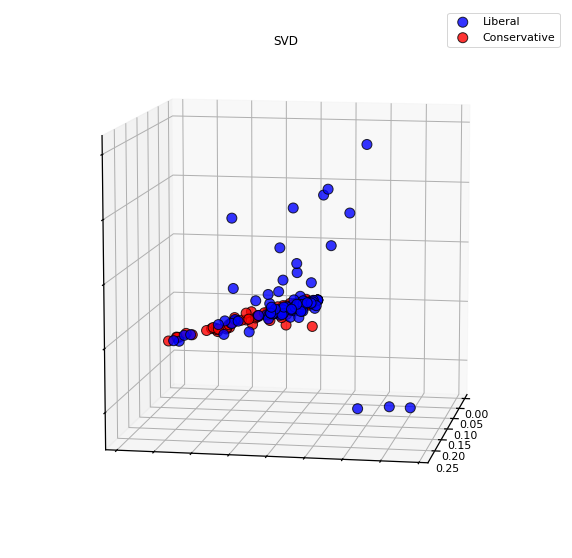

In [ ]:
plot_vectors(plot_matrix, title='SVD', labels=plot_labels, dimensions=3)

In [ ]:
for i in range(0,360,10):
  plot_vectors(plot_matrix, title='SVD', labels=plot_labels, dimensions=3, orientation=i)

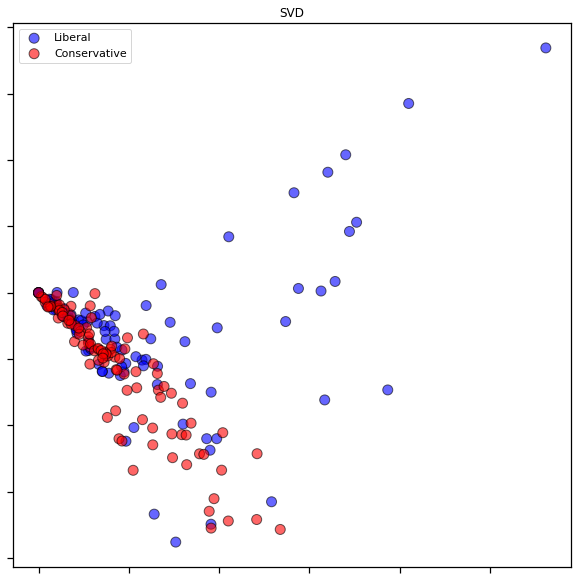

In [ ]:
plot_vectors(plot_matrix, title='SVD', labels=plot_labels, dimensions=2)

In [ ]:
for i in range(0,360,10):
  plot_vectors(low_dim_U, title='SVD', labels=labels, dimensions=3, orientation=i)

Output hidden; open in https://colab.research.google.com to view.

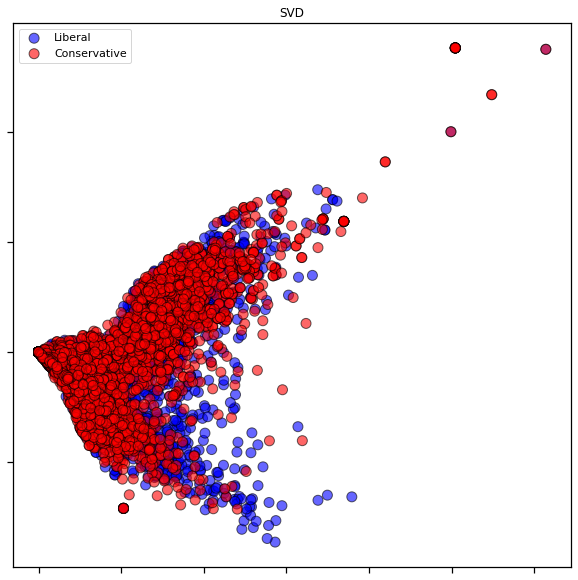

In [ ]:
plot_vectors(low_dim_U, title='SVD', labels=labels, dimensions=2)

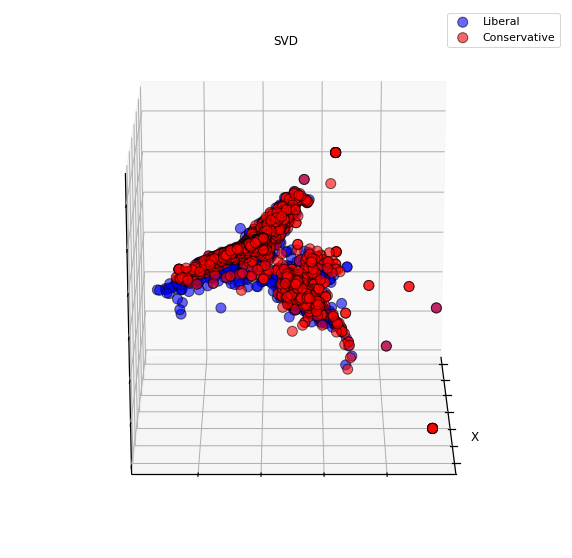

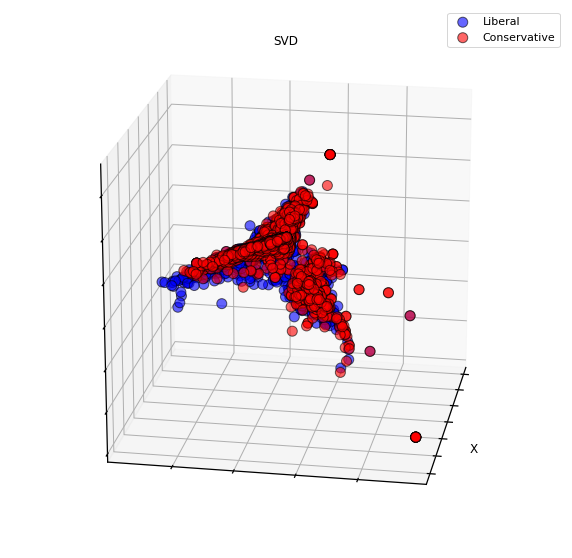

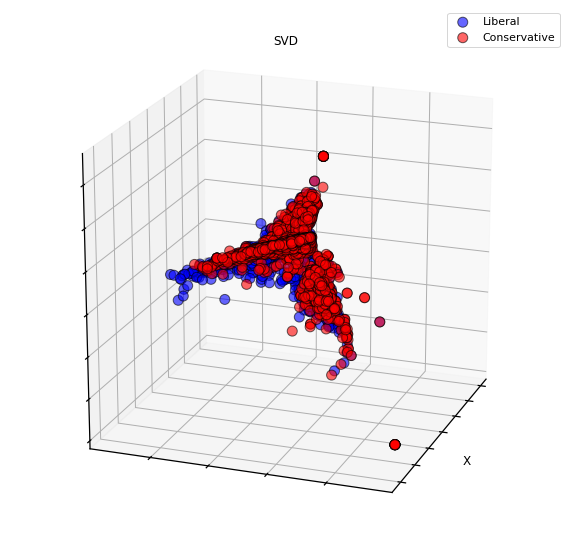

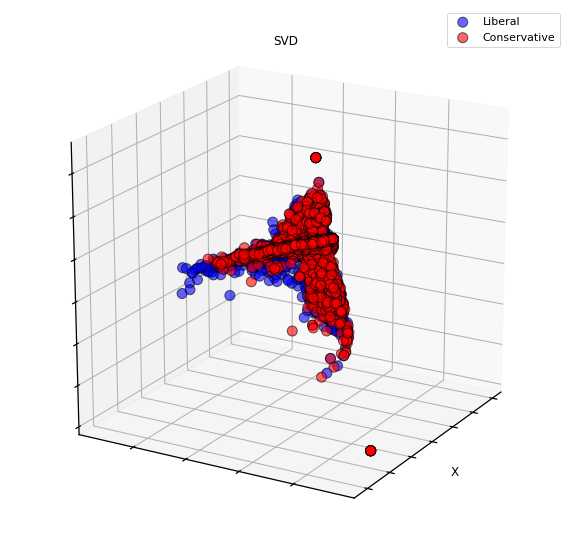

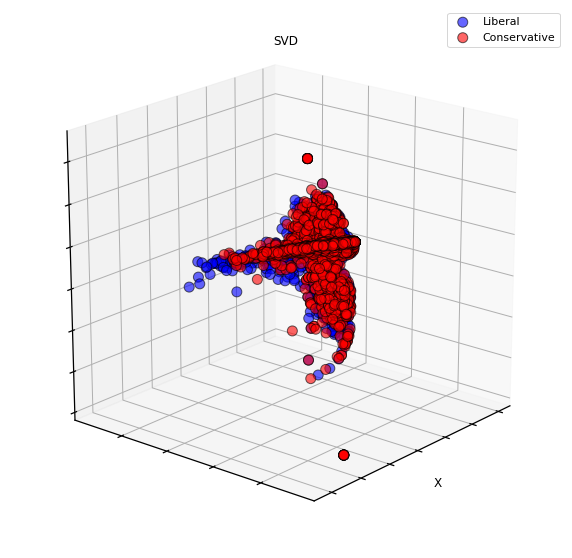

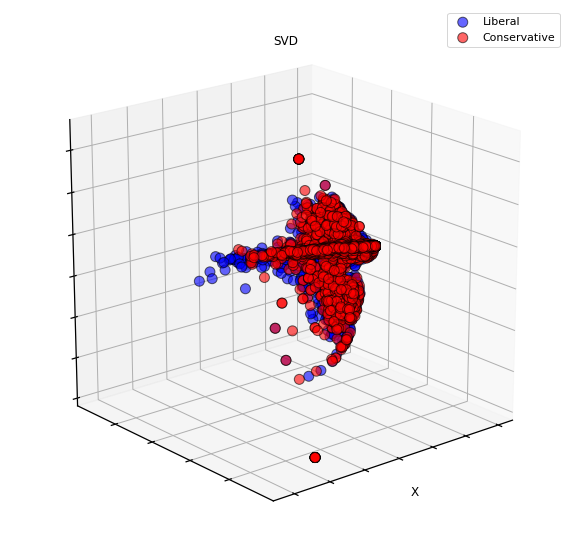

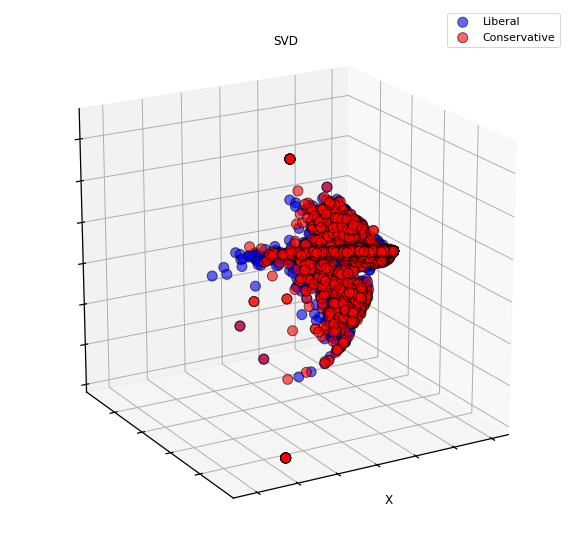

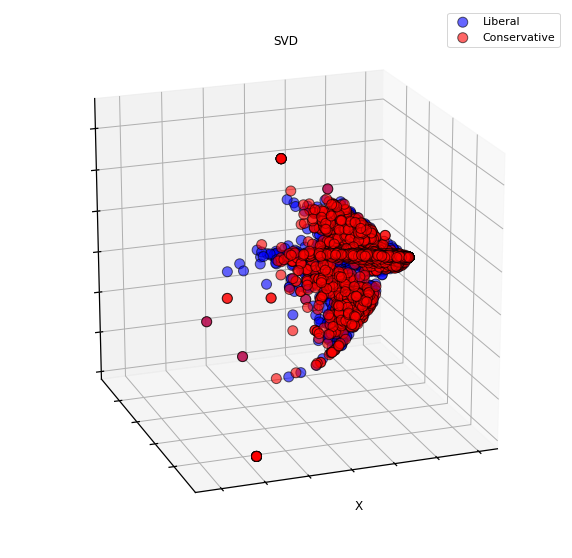

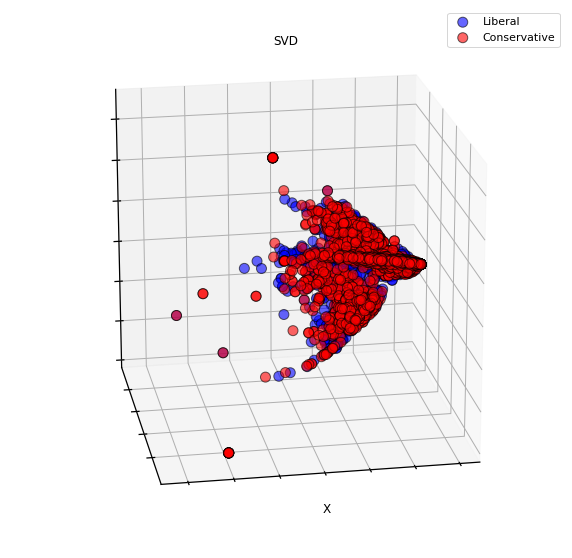

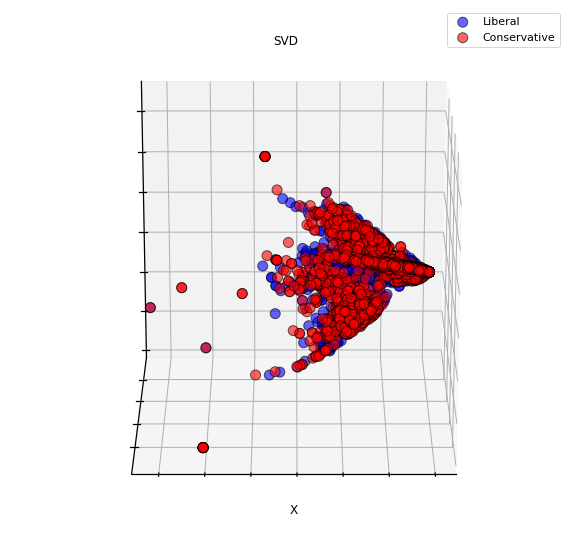

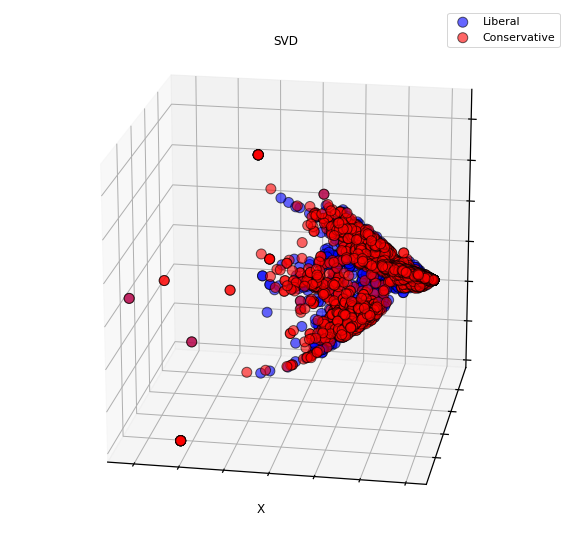

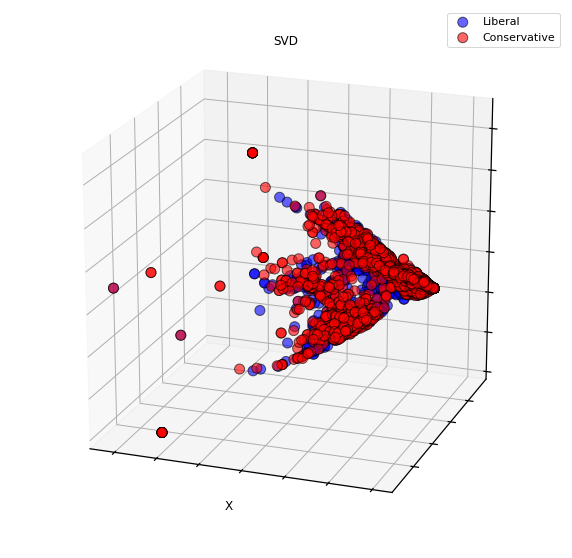

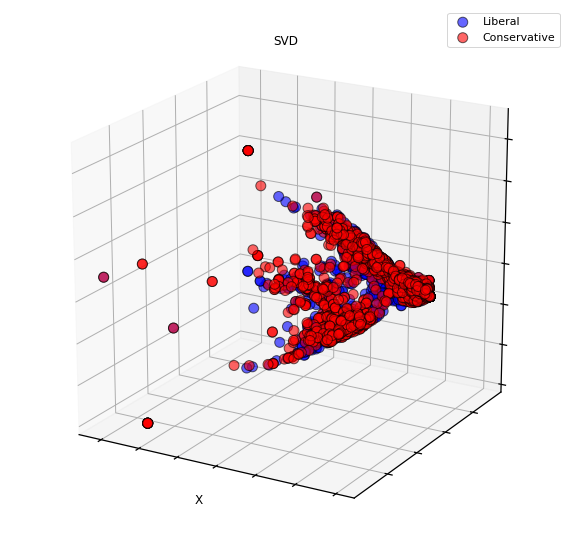

KeyboardInterrupt: ignored

In [ ]:
for i in range(0,360,10):
  plot_vectors(low_dim_U, title='SVD', labels=labels, dimensions=3, orientation=i)

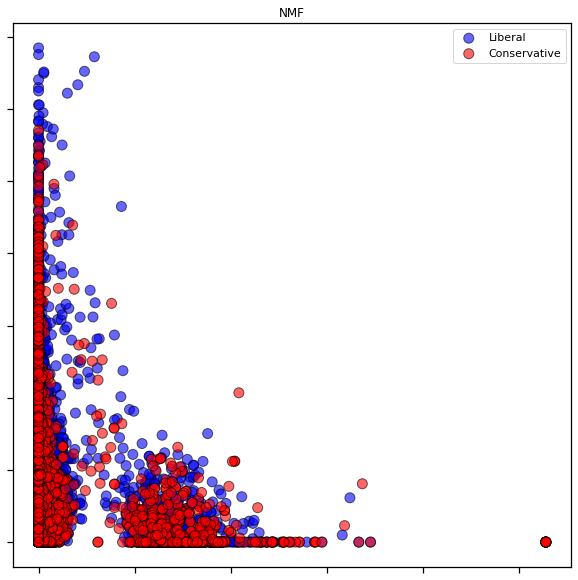

In [ ]:
plot_vectors(low_dim_W, title='NMF', labels=labels, dimensions=2)

In [ ]:
for i in range(0,360,10):
  plot_vectors(low_dim_W, title='NMF', labels=labels, dimensions=3, orientation=i )

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
plot_matrix = low_dim_W[:100]
plot_matrix = np.vstack((plot_matrix, low_dim_W[-100:]))
plot_labels

['Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 'Li

In [ ]:
for i in range(0,360,10):
  plot_vectors(plot_matrix, title='NMF', labels=plot_labels, dimensions=3, orientation=i )

Output hidden; open in https://colab.research.google.com to view.

# Topic modeling

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
import plotly.graph_objects as go

In [ ]:
sanitized_df = pd.read_pickle('sanitized_df.pkl')
sanitized_conservative_df = pd.read_pickle('sanitized_conservative_df.pkl')
sanitized_liberal_df = pd.read_pickle('sanitized_liberal_df.pkl')

posts = sanitized_df['clean_title'].to_list()

In [ ]:
posts = sanitized_df['clean_title'].to_list()

In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), 
                                   stop_words='english', 
                                   analyzer='word', 
                                   min_df=0.001, 
                                   max_df=0.7, 
                                   sublinear_tf=True, # Apply sublinear tf scaling, i.e. replace tf with 1 + log(tf)
                                   use_idf=True)      # Enable inverse-document-frequency reweighting

X = tfidf_vectorizer.fit_transform(posts) # X is the term-document matrix
print(X.shape)

(12854, 3420)


## Matrix factorization

In [ ]:
k = 5

In [ ]:
# SVD
svd = TruncatedSVD(n_components=k)
%time U = svd.fit_transform(X) # output the time to run this line
S = svd.singular_values_
V = svd.components_
print(U.shape, S.shape, V.shape)

CPU times: user 89 ms, sys: 75 ms, total: 164 ms
Wall time: 89.9 ms
(12854, 5) (5,) (5, 3420)


In [ ]:
nmf = NMF(n_components=k, init='nndsvd', random_state=0)
%time W = nmf.fit_transform(X)
H = nmf.components_
print(W.shape, H.shape)

CPU times: user 248 ms, sys: 186 ms, total: 434 ms
Wall time: 261 ms
(12854, 5) (5, 3420)


In [ ]:
def show_topics(A, vocabulary, topn=5):
    """
    find the top N words for each of the latent dimensions (=rows) in A
    """
    topic_words = [ [vocabulary[i] for i in np.argsort(t)[:-topn-1:-1]] for t in A] 
    # for each row t in matrix A, I apply np.argsort(t) and I obtain the indexes that would sort the elements of t
    # then I access the last topn indexes in reverse order
    list_topics = [', '.join(t) for t in topic_words]
    fig = go.Figure(data=[go.Table(header=dict(values=['Topic Number', 'Words']),
                                  cells=dict(values=[[1,2,3,4,5,6,7], list_topics]),
                                  columnwidth = [80,200])
                          ]
                    )
    fig.show()
    return 


terms = tfidf_vectorizer.get_feature_names_out()    

In [ ]:
a = [2,1,8,4,5,6,7,3]
print(a[:-3-1:-1])   # access last 3 elements in reversed order
print(np.argsort(a)) # returns the indexes that would sort a
print(np.argsort(a)[:-3-1:-1]) 

[3, 7, 6]
[1 0 7 3 4 5 6 2]
[2 6 5]


In [ ]:
for t in X:
  print(t)
  break

  (0, 545)	0.23033019752757816
  (0, 1538)	0.2481833680707998
  (0, 1540)	0.3030492897645176
  (0, 1794)	0.3030492897645176
  (0, 1993)	0.2549932068748965
  (0, 2674)	0.28921234947193813
  (0, 2810)	0.35791521145823546
  (0, 3002)	0.29056170779402396
  (0, 3380)	0.33531501556966226
  (0, 3502)	0.3242170771705102
  (0, 3558)	0.22535068787210044
  (0, 3559)	0.26859773505688384


In [ ]:
show_topics(V, terms)

In [ ]:
show_topics(H, terms)

['state, worker, social, party, government',
 'trump, donald trump, donald, president, election',
 'biden, joe, joe biden, poll, court',
 'ukraine, russia, putin, russian, invasion',
 'capitalism, anarcho, socialism, anarcho capitalism, market']

### Conservative

In [ ]:
conservative_posts = sanitized_conservative_df['clean_title'].to_list()

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), 
                                   stop_words='english', 
                                   analyzer='word', 
                                   min_df=0.001, 
                                   max_df=0.7, 
                                   sublinear_tf=True,
                                   use_idf=True)     

Xconservative = tfidf_vectorizer.fit_transform(conservative_posts)
print(Xconservative.shape)

(4535, 3338)


In [ ]:
k=7

svd = TruncatedSVD(n_components=k)
U = svd.fit_transform(Xconservative)
S = svd.singular_values_
V = svd.components_
print(U.shape, S.shape, V.shape)

nmf = NMF(n_components=k, init='nndsvd', random_state=0)
W = nmf.fit_transform(Xconservative)
H = nmf.components_
print(W.shape, H.shape)

terms = tfidf_vectorizer.get_feature_names_out()

(4535, 7) (7,) (7, 3338)
(4535, 7) (7, 3338)


In [ ]:
show_topics(H, terms)

In [ ]:
show_topics(V, terms)

### Liberal

In [ ]:
liberal_posts = sanitized_liberal_df['clean_title'].to_list()

Liberal_tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), 
                                   stop_words='english', 
                                   analyzer='word', 
                                   min_df=0.001, 
                                   max_df=0.7, 
                                   sublinear_tf=True,
                                   use_idf=True)     

Xliberal = Liberal_tfidf_vectorizer.fit_transform(liberal_posts)
print(Xliberal.shape)

k=7

svd = TruncatedSVD(n_components=k)
U = svd.fit_transform(Xliberal)
S = svd.singular_values_
V = svd.components_
print(U.shape, S.shape, V.shape)

nmf = NMF(n_components=k, init='nndsvd', random_state=0)
W = nmf.fit_transform(Xliberal)
H = nmf.components_
print(W.shape, H.shape)

terms = Liberal_tfidf_vectorizer.get_feature_names_out()

(8319, 3442)
(8319, 7) (7,) (7, 3442)
(8319, 7) (7, 3442)


In [ ]:
show_topics(H, terms)

In [ ]:
show_topics(V, terms)

## LDA

In [ ]:
from gensim.models import LdaMulticore, TfidfModel, CoherenceModel
from gensim.corpora import Dictionary
import time 
import multiprocessing 
import random

random.seed(41)

In [ ]:
sanitized_df = pd.read_pickle('sanitized_df_stem_colloc.pkl')
sanitized_conservative_df = pd.read_pickle('sanitized_conservative_df_stem_coll.pkl')
sanitized_liberal_df = pd.read_pickle('sanitized_liberal_df_stem_coll.pkl')

posts = sanitized_df['clean_title']

# shuffle the data frame
random.seed(41)
sanitized_df = sanitized_df.sample(frac = 1)
sanitized_df = sanitized_df.reset_index().drop(columns=['index'])

In [ ]:
sanitized_df

political_lean                                        clean_title
0            Liberal          worker kellogg fold great day labor right
1            Liberal  trump help bankrol arizona senat audit text su...
2       Conservative                              commi capit live suck
3       Conservative  blame capit british empir atroc blame spoon ri...
4            Liberal             strike work give surrend solidar forev
...              ...                                                ...
12849        Liberal       opinion sarah palin cut edg crazi trail pack
12850        Liberal                                        feel monday
12851   Conservative        biden victori covid hard distinguish defeat
12852   Conservative  poll florida gov desanti earn strong job perfo...
12853        Liberal  trump campaign offici led rudi giuliani oversa...

[12854 rows x 2 columns]

In [ ]:
splitted_by_word_posts = sanitized_df.clean_title.apply(str.split)

In [ ]:
splitted_by_word_posts

0        [seattle, socialist, city, councilor, kshama, ...
1        [moscow, tells, unitedstates, tech, firms, set...
2        [wall, street, journal, story, haunted, career...
3                                    [paying, money, cost]
4                   [michael, parenti, nature, capitalism]
                               ...                        
12849    [aaron, mate, biden, white, house, slams, trum...
12850    [socialist, economic, concepts, recommend, the...
12851    [libertarian, believe, values, hold, society, ...
12852     [build, mass, anti, anti, imperialist, movement]
12853    [problem, billionaires, moment, consider, prob...
Name: clean_title, Length: 12854, dtype: object

In [ ]:
dictionary = Dictionary(splitted_by_word_posts)

In [ ]:
dictionary.filter_extremes(no_below=50, no_above=0.1)
print(dictionary, flush=True)
print('')
#replace words by their numerical IDs and their frequency
# translate corpus into a bow model and then tf-idf
ldacorpus = [dictionary.doc2bow(text) for text in splitted_by_word_posts]
tfidfmodel = TfidfModel(ldacorpus)
# transform raw frequencies into TFIDF
model_corpus = tfidfmodel[ldacorpus]

i = 10
print(f"tokens after preprocessing:{sanitized_df.clean_title.iloc[i]}")
# bow representaiton 
print(f"Bow representation:{ldacorpus[i]}") 
print(f"tf-idf representation:{model_corpus[i]}")

Dictionary(1002 unique tokens: ['day', 'great', 'labor', 'right', 'worker']...)

tokens after preprocessing:sex grow asexu movement
Bow representation:[(66, 1), (67, 1), (68, 1)]
tf-idf representation:[(66, 0.6112628306200731), (67, 0.5086976179963053), (68, 0.6062874609846558)]


In [ ]:
coherence_values = []

dev_size = 9000
eval_size = 3853

for num_topics in range(3, 20):
    print(f"Number of topics:{num_topics}")
    model = LdaMulticore(corpus=model_corpus[:dev_size], id2word=dictionary, num_topics=num_topics) # parallelized version of LDA

    coherencemodel_umass = CoherenceModel(model=model, 
                                          texts=splitted_by_word_posts[dev_size:dev_size+eval_size], 
                                          dictionary=dictionary, 
                                          coherence='u_mass')

    coherencemodel_cv = CoherenceModel(model=model, 
                                       texts=splitted_by_word_posts[dev_size:dev_size+eval_size], 
                                       dictionary=dictionary, 
                                       coherence='c_v')

    umass_score = coherencemodel_umass.get_coherence()
    cv_score = coherencemodel_cv.get_coherence()
    
    print(f"Umass_score:{umass_score}, CV_score:{cv_score}")
    coherence_values.append((num_topics, umass_score, cv_score))

Number of topics:3
Umass_score:-3.6420731723226094, CV_score:0.25106600465743717
Number of topics:4
Umass_score:-3.5823493621436886, CV_score:0.27444926447217094
Number of topics:5
Umass_score:-4.807380222900856, CV_score:0.31540978449912904
Number of topics:6
Umass_score:-4.769064991001729, CV_score:0.31207415596811167
Number of topics:7
Umass_score:-4.757864907893576, CV_score:0.3207709840852064
Number of topics:8
Umass_score:-5.1249192624644255, CV_score:0.2994245936143688
Number of topics:9
Umass_score:-5.9620961806491914, CV_score:0.3495400194175921
Number of topics:10
Umass_score:-5.667204647693408, CV_score:0.35204264524463075
Number of topics:11
Umass_score:-5.765042800843988, CV_score:0.37278069079731035
Number of topics:12
Umass_score:-5.904568835811051, CV_score:0.35083039912928565
Number of topics:13
Umass_score:-6.035888024693235, CV_score:0.3641184875283669
Number of topics:14
Umass_score:-5.895565463230001, CV_score:0.3474999307334462
Number of topics:15
Umass_score:-6.8

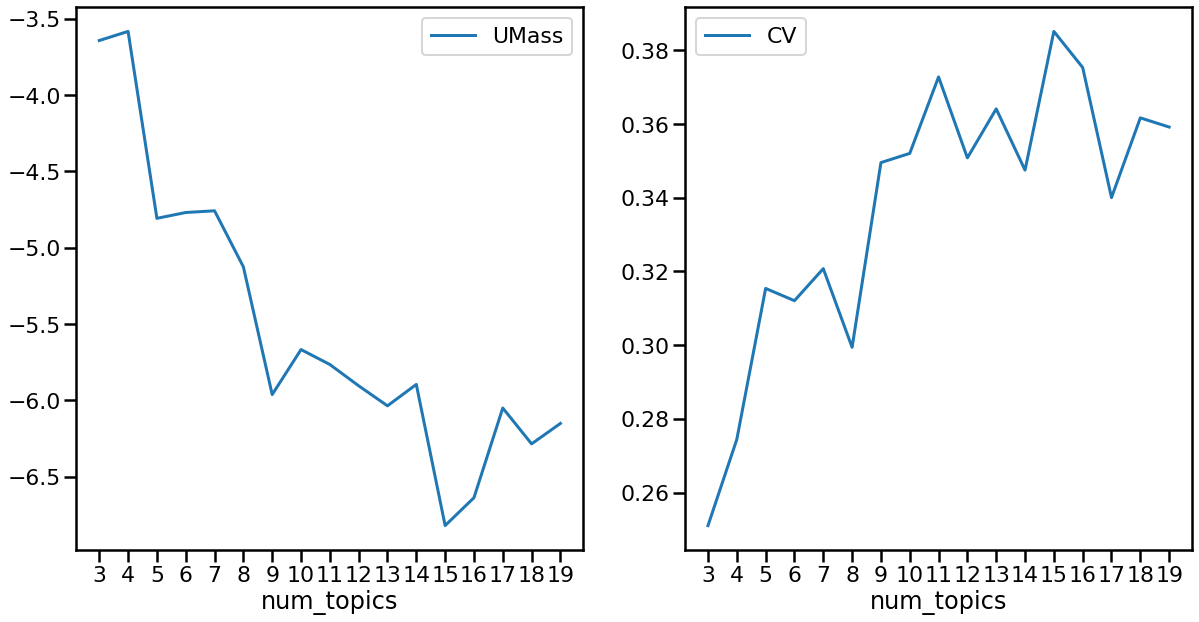

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set_context('poster') # use large font

scores = pd.DataFrame(coherence_values, columns=['num_topics', 'UMass', 'CV'])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
scores.plot.line(x='num_topics', y='UMass', ax=ax[0], xticks=range(3,20));
scores.plot.line(x='num_topics', y='CV', ax=ax[1], xticks=range(3,20));


In [ ]:
num_topics = 4

# find chunksize to make about 400 updates
num_passes = 10
chunk_size = len(model_corpus) * num_passes/400
print(chunk_size)

start = time.time()
print("fitting model", flush=True)
model = LdaMulticore(num_topics=num_topics, # number of topics
                     corpus=model_corpus,   # what to train on 
                     id2word=dictionary,    # mapping from IDs to words
                     workers=min(10, multiprocessing.cpu_count()-1), # choose 10 cores, or whatever computer has
                     passes=num_passes,     # make this many passes over data
                     chunksize=chunk_size,  # update after this many instances
                     alpha=0.5
                    )
    
print("done in {}".format(time.time()-start), flush=True)


321.35
fitting model
done in 57.84587073326111


In [ ]:
# transform the data into topic distros
# model_corpus is the tf-idf rep of the corpus
# by applying the LDA model on a document we obtain the probability distribution of the topics
topic_corpus = model[model_corpus]

topic_corpus[0] # prob distr of topics for doc 0

[(0, 0.23377249), (1, 0.4297794), (2, 0.11832085), (3, 0.21812727)]

In [ ]:
topic_corpus[4]

[(0, 0.12605634), (1, 0.486012), (2, 0.12605624), (3, 0.26187542)]

In [ ]:
model.print_topics()
# the topic is a distribution over words and we have for each topic (0,1,2,3,4,5)
# starting from the most probabble one

[(0,
  '0.035*"trump" + 0.023*"democrat" + 0.019*"elect" + 0.019*"vote" + 0.019*"republican" + 0.015*"america" + 0.012*"state" + 0.011*"law" + 0.010*"black" + 0.010*"call"'),
 (1,
  '0.016*"social" + 0.015*"capit" + 0.012*"worker" + 0.011*"work" + 0.010*"govern" + 0.010*"make" + 0.009*"union" + 0.008*"time" + 0.008*"libertarian" + 0.007*"tax"'),
 (2,
  '0.035*"biden" + 0.027*"ukrain" + 0.019*"russia" + 0.017*"parti" + 0.017*"american" + 0.016*"presid" + 0.015*"putin" + 0.014*"opinion" + 0.013*"poll" + 0.013*"left"'),
 (3,
  '0.018*"year" + 0.015*"hous" + 0.014*"communist" + 0.014*"woman" + 0.014*"white" + 0.013*"unitedst" + 0.012*"day" + 0.012*"anti" + 0.011*"plan" + 0.011*"report"')]

In [ ]:
# get the topic descritions
topic_sep = re.compile(r"0\.[0-9]{3}\*") # getting rid of useless formatting
# extract a list of tuples with topic number and descriptors from the model
model_topics = [(topic_no, re.sub(topic_sep, '', model_topic).split(' + ')) for topic_no, model_topic in
                model.print_topics(num_topics=num_topics, num_words=10)]

descriptors = []
for i, m in model_topics:
    print(i+1, ", ".join(m[:10]))
    descriptors.append(", ".join(m[:4]).replace('"', ''))

1 "trump", "democrat", "elect", "vote", "republican", "america", "state", "law", "black", "call"
2 "social", "capit", "worker", "work", "govern", "make", "union", "time", "libertarian", "tax"
3 "biden", "ukrain", "russia", "parti", "american", "presid", "putin", "opinion", "poll", "left"
4 "year", "hous", "communist", "woman", "white", "unitedst", "day", "anti", "plan", "report"


In [ ]:
descriptors

['trump, democrat, elect, vote',
 'social, capit, worker, work',
 'biden, ukrain, russia, parti',
 'year, hous, communist, woman']

In [ ]:
target_category = 'political_lean'

# get a list of all the topic scores for each document
scores = [[t[1] for t in topic_corpus[entry]] for entry in range(len(sanitized_df))]
# turn that into a data frame with N rows and K columns, each with the score of the corresponding topic
topic_distros = pd.DataFrame(data=scores, columns=descriptors)
# add the review category of each document (so we can aggregate)
topic_distros['category'] = sanitized_df[target_category]

In [ ]:
topic_distros.head()
# just create a dataframe with the descriptors and the category country

trump, democrat, elect, republican  woman, year, worker, opinion  \
0                            0.157505                      0.183130   
1                            0.370002                      0.092746   
2                            0.113436                      0.113436   
3                            0.173173                      0.137797   
4                            0.100657                      0.256903   

   biden, ukrain, russia, america  capit, communist, parti, polit  \
0                        0.095663                        0.176367   
1                        0.092745                        0.092744   
2                        0.113436                        0.257885   
3                        0.142607                        0.357084   
4                        0.221057                        0.106293   

   make, socialist, child, post  social, govern, countri, democraci  \
0                      0.187448                            0.199887   
1                      0.169577                            0.182185   
2                      0.288370                            0.113436   
3                      0.080466                            0.108873   
4                      0.208955                            0.106135   

       category  
0       Liberal  
1       Liberal  
2  Conservative  
3  Conservative  
4       Liberal

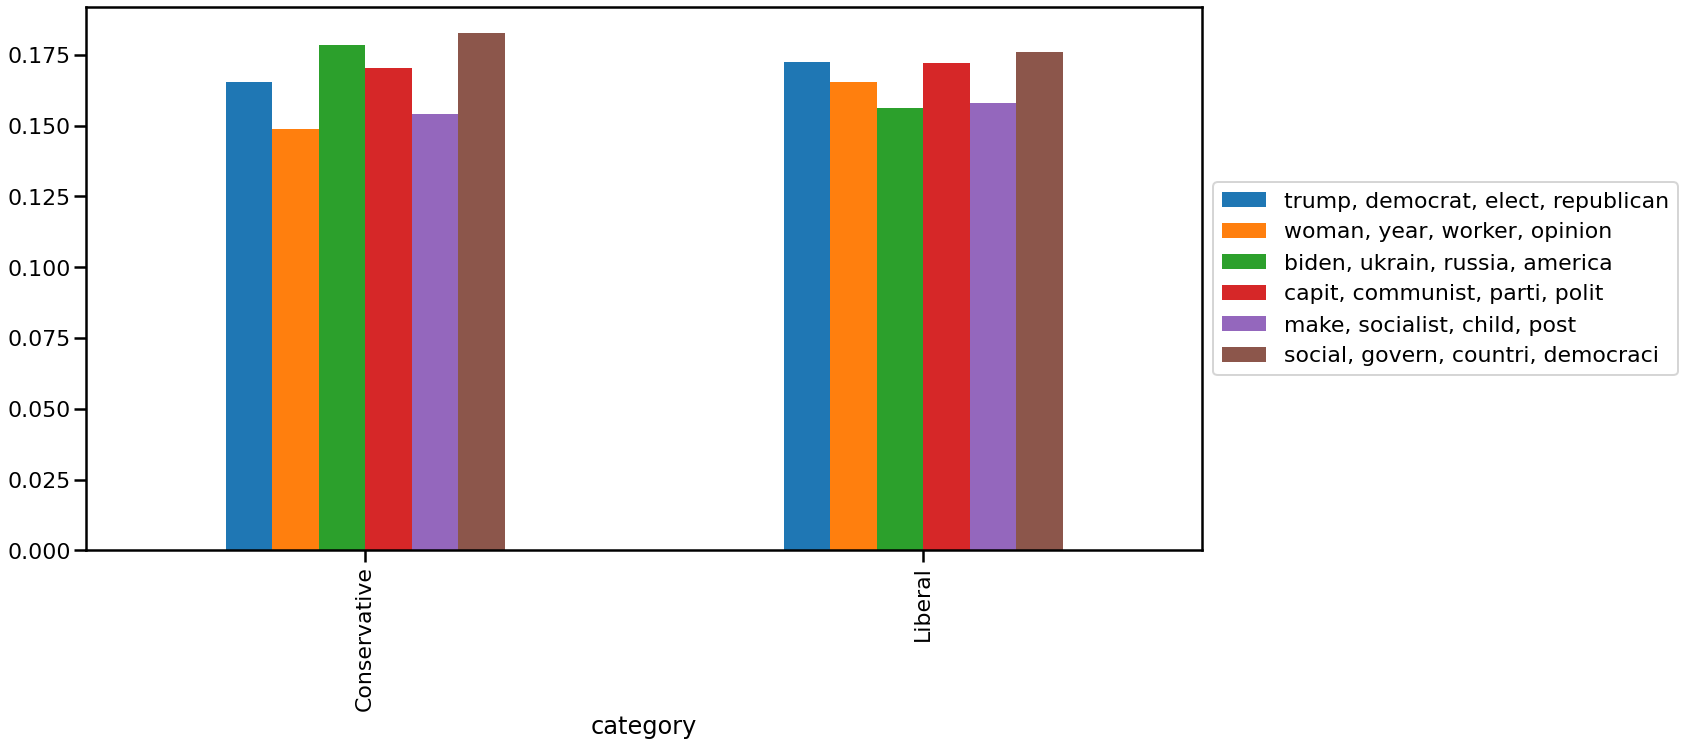

In [ ]:
import matplotlib.pyplot as plt # make graphs
import seaborn # make prettier graphs

seaborn.set_context('poster') # use large font

fig, ax = plt.subplots(figsize=(20, 10)) # set graph size
# aggregate topics by categories
aggregate_by_category = topic_distros[topic_distros.category.isin('Conservative Liberal'.split())]
aggregate_by_category = aggregate_by_category.groupby(aggregate_by_category.category).mean()
# plot the graph
aggregate_by_category[descriptors].plot.bar(ax=ax);
# move the legend out
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

### Author topic model

In [ ]:
from gensim.models import AuthorTopicModel
from gensim.test.utils import datapath, temporary_file
from collections import defaultdict

In [ ]:
author2doc = {}

for country in sanitized_df.political_lean.value_counts().keys():
  author2doc[country] = []

for i, lean in enumerate(sanitized_df.political_lean):
    author2doc[lean].append(i) # index of the review associated to the country
    
len(author2doc)

2

In [ ]:
from gensim.corpora import mmcorpus
corpus = mmcorpus.MmCorpus(datapath('testcorpus.mm'))

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


In [ ]:
num_topics = 5
author_model = AuthorTopicModel(corpus=list(ldacorpus), 
                                author2doc=author2doc, 
                                id2word=dictionary, 
                                num_topics=num_topics)

author_model.print_topics()

Streaming output truncated to the last 5000 lines.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cts = np.array([cnt for _, cnt in doc], dtype=np.int)
/usr/local/lib/python3.7/dist-packages/gensim/models/atmodel.py:468: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  authors_d = np.array([self.author2id[a] for a in self.doc2author[doc_no]], dtype=np.int)
/usr/local/lib/python3.7/dist-packages/gensim/models/atmodel.py:464: DeprecationWarning: `np.int` is a deprecated alias

[(0,
  '0.027*"workers" + 0.019*"class" + 0.018*"labor" + 0.018*"working" + 0.017*"women" + 0.012*"power" + 0.012*"time" + 0.011*"years" + 0.011*"work" + 0.010*"union"'),
 (1,
  '0.050*"trump" + 0.024*"biden" + 0.013*"capital" + 0.012*"police" + 0.012*"value" + 0.011*"freedom" + 0.011*"poll" + 0.011*"putin" + 0.011*"media" + 0.010*"desantis"'),
 (2,
  '0.039*"capitalism" + 0.021*"government" + 0.019*"ukraine" + 0.018*"market" + 0.015*"system" + 0.015*"socialism" + 0.014*"biden" + 0.014*"state" + 0.013*"unitedstates" + 0.012*"money"'),
 (3,
  '0.027*"social" + 0.026*"party" + 0.020*"capitalist" + 0.018*"democracy" + 0.017*"socialist" + 0.016*"democratic" + 0.015*"socialism" + 0.014*"economic" + 0.013*"capitalism" + 0.012*"state"'),
 (4,
  '0.028*"government" + 0.027*"ukraine" + 0.024*"russia" + 0.018*"time" + 0.017*"money" + 0.015*"capitalism" + 0.015*"free" + 0.014*"society" + 0.014*"work" + 0.013*"make"')]

In [ ]:
coherence_values = []
author_model_list = []

dev_size = 9000
eval_size = 3853

dev_author2doc = {key: [idx for idx in value if idx < dev_size] for key, value in author2doc.items()}

for num_topics in range(4, 10):
    author_model = AuthorTopicModel(corpus=(ldacorpus[:dev_size]), 
                                    author2doc=dev_author2doc, 
                                    id2word=dictionary, 
                                    num_topics=num_topics)
#     author_model_list.append(author_model)
    
    coherencemodel_umass = CoherenceModel(model=author_model, 
                                          texts=splitted_by_word_posts[dev_size:dev_size+eval_size], 
                                          dictionary=dictionary, 
                                          coherence='u_mass')

    coherencemodel_cv = CoherenceModel(model=author_model, 
                                       texts=splitted_by_word_posts[dev_size:dev_size+eval_size], 
                                       dictionary=dictionary, 
                                       coherence='c_v')

    umass_score = coherencemodel_umass.get_coherence()
    cv_score = coherencemodel_cv.get_coherence()
    
    print(num_topics, umass_score, cv_score)
    coherence_values.append((num_topics, umass_score, cv_score))

Output hidden; open in https://colab.research.google.com to view.

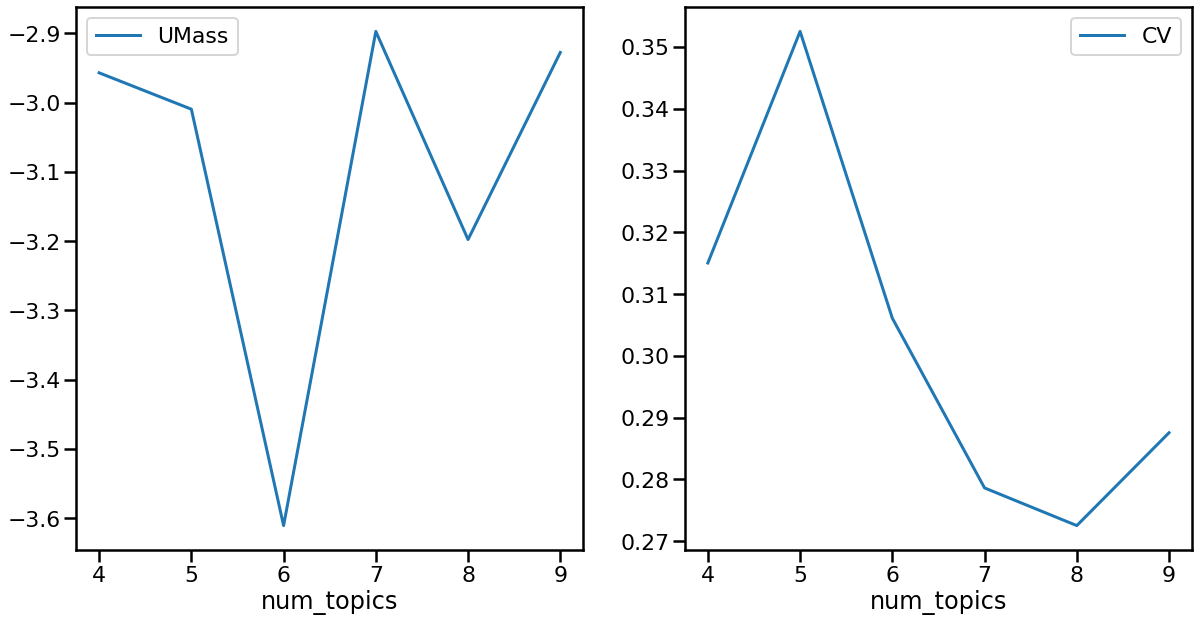

In [ ]:
%matplotlib inline
scores = pd.DataFrame(coherence_values, columns=['num_topics', 'UMass', 'CV'])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
scores.plot.line(x='num_topics', y='UMass', ax=ax[0], xticks=range(4,10));
scores.plot.line(x='num_topics', y='CV', ax=ax[1], xticks=range(4,10));

In [ ]:
n_topics_author = 5


author_model = AuthorTopicModel(corpus=list(model_corpus), 
                                author2doc=author2doc, 
                                id2word=dictionary, 
                                num_topics=n_topics_author,
                                passes=num_passes,
                                chunksize=chunk_size,
                                alpha=0.5
)

Streaming output truncated to the last 5000 lines.
  cts = np.array([cnt for _, cnt in doc], dtype=np.int)
/usr/local/lib/python3.7/dist-packages/gensim/models/atmodel.py:468: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  authors_d = np.array([self.author2id[a] for a in self.doc2author[doc_no]], dtype=np.int)
/usr/local/lib/python3.7/dist-packages/gensim/models/atmodel.py:464: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe.

In [ ]:
author_model_topics = [(topic_no, re.sub(topic_sep, '', model_topic).split(' + ')) for topic_no, model_topic in
                author_model.print_topics(num_topics=n_topics_author, num_words=5)]

author_descriptors = []
for i, m in sorted(author_model_topics):
    print(i+1, ", ".join(m[:5]))
    author_descriptors.append(", ".join(m[:2]).replace('"', ''))

1 "women", "ukraine", "white", "sex", "class"
2 "unitedstates", "democrats", "republicans", "communist", "america"
3 "trump", "money", "freedom", "russia", "socialist"
4 "job", "capitalism", "biden", "anti", "post"
5 "r", "covid", "police", "work", "china"


In [ ]:
author_vecs = {author: {author_descriptors[t]: 0.0
                         for t in range(author_model.num_topics)}
              for author in author_model.id2author.values()
              }
for author in author_model.id2author.values():
    for (t, v) in author_model.get_author_topics(author):
        author_vecs[author][author_descriptors[t]] = v

for lean in 'Conservative Liberal'.split():
    print(lean, author_vecs[lean])      

Conservative {'women, ukraine': 0.029431733343922968, 'unitedstates, democrats': 0.014088991551534827, 'trump, money': 0.6936346157873726, 'job, capitalism': 0.1424793307479355, 'r, covid': 0.12036532856923414}
Liberal {'women, ukraine': 0.10342674432525821, 'unitedstates, democrats': 0.12581139578359443, 'trump, money': 0.30739520850437607, 'job, capitalism': 0.4623991438770623, 'r, covid': 0.0}


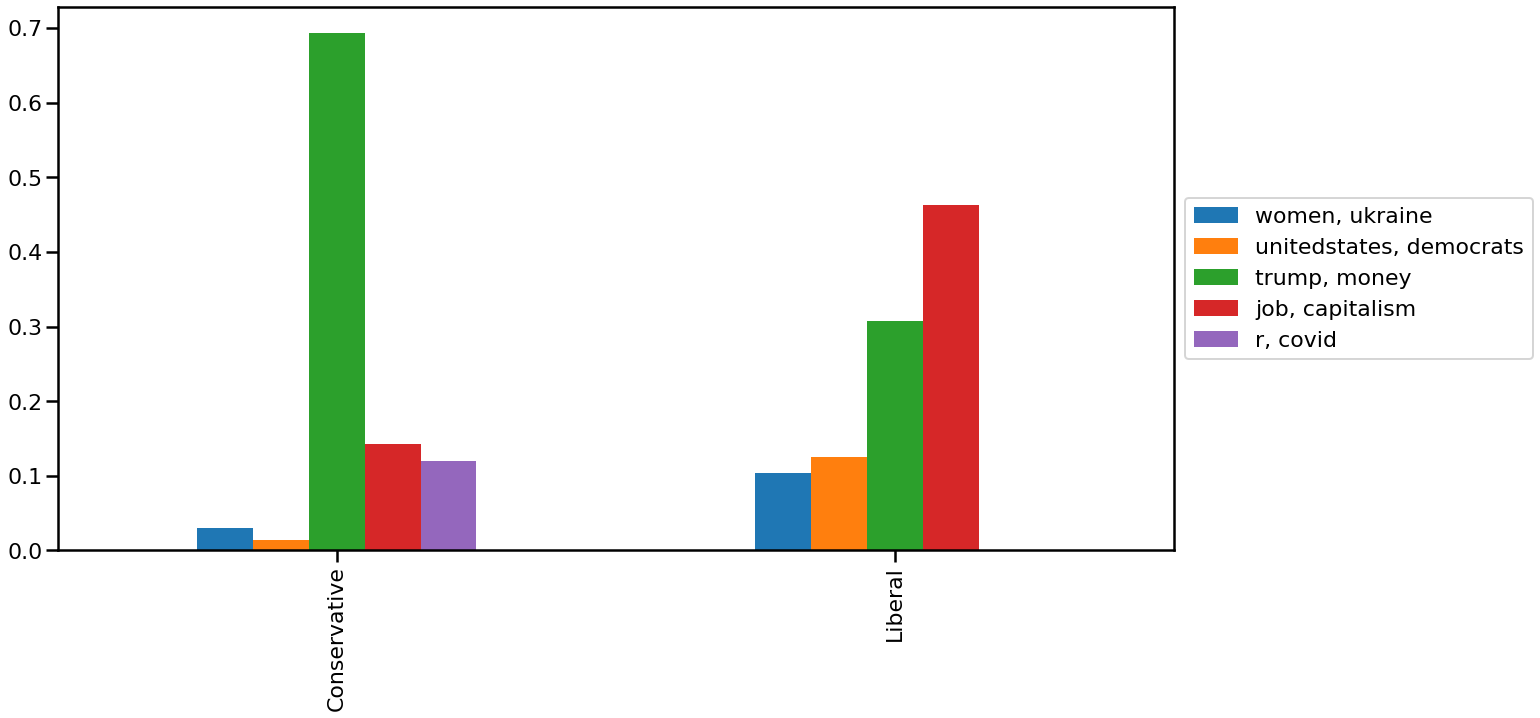

In [ ]:
author_df = pd.DataFrame.from_dict(author_vecs)
fig, ax = plt.subplots(figsize=(20,10))
author_df['Conservative Liberal'.split()].T.plot.bar(ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

### Conservative LDA

In [ ]:
sanitized_conservative_df.shape

(4535, 2)

In [ ]:
sanitized_conservative_df

political_lean                                        clean_title
8319    Conservative             russia receiv venezuela strong support
8320    Conservative  sotu rebutt rashida tlaib call biden green dea...
8321    Conservative  break pfizer vaccin data releas advers reactio...
8322    Conservative                   biden state union address second
8323    Conservative  crime hunter biden associ sentenc prison order...
...              ...                                                ...
12849   Conservative             ron paul spirit defens leak free inion
12850   Conservative  anarcho capit opinion doctrin system implement...
12851   Conservative  mi project dedic advanc austrian school econom...
12852   Conservative                fireman protect monopoli fail capit
12853   Conservative  articl written mi listen write murray rothbard...

[4535 rows x 2 columns]

In [ ]:
sanitized_conservative_df = sanitized_conservative_df.reset_index()

In [ ]:
sanitized_conservative_df = sanitized_conservative_df.drop(columns=['index'])

In [ ]:
splitted_by_word_posts = sanitized_conservative_df.clean_title.apply(str.split)
dictionary = Dictionary(splitted_by_word_posts)
dictionary.filter_extremes(no_below=50, no_above=0.3)
print(dictionary, flush=True)
print('')
#replace words by their numerical IDs and their frequency
# translate corpus into a bow model and then tf-idf
ldacorpus = [dictionary.doc2bow(text) for text in splitted_by_word_posts]
tfidfmodel = TfidfModel(ldacorpus)
# transform raw frequencies into TFIDF
model_corpus = tfidfmodel[ldacorpus]

i = 10
print(f"tokens after preprocessing: {sanitized_conservative_df.clean_title.iloc[i]}")
# bow representaiton 
print(f"Bow representation:{ldacorpus[i]}") 
print(f"tf-idf representation:{model_corpus[i]}")

Dictionary(252 unique tokens: ['russia', 'support', 'biden', 'call', 'deal']...)

tokens after preprocessing: mexico declin impos econom sanction russia mexican presid critic character censorship russian state medium agre fact medium russia countri censor lopez obrador
Bow representation:[(0, 2), (7, 1), (13, 1), (14, 1), (15, 2), (16, 1), (39, 1), (40, 1), (41, 1), (42, 1)]
tf-idf representation:[(0, 0.3873322891917127), (7, 0.20910264953203347), (13, 0.24760994387429272), (14, 0.3134814669396442), (15, 0.5493012273005172), (16, 0.23043935458302853), (39, 0.3027141453299877), (40, 0.233725398242402), (41, 0.2923992496339183), (42, 0.24509915152998665)]


In [ ]:
num_topics = 5

# find chunksize to make about 500 updates
num_passes = 50
chunk_size = len(model_corpus) * num_passes/500
print(chunk_size)

start = time.time()
print("fitting model", flush=True)
model = LdaMulticore(num_topics=num_topics, # number of topics
                     corpus=model_corpus,   # what to train on 
                     id2word=dictionary,    # mapping from IDs to words
                     workers=min(10, multiprocessing.cpu_count()-1), # choose 10 cores, or whatever computer has
                     passes=num_passes,     # make this many passes over data
                     chunksize=chunk_size,  # update after this many instances
                     alpha=0.5
                    )
    
print("done in {}".format(time.time()-start), flush=True)

453.5
fitting model
done in 69.30767226219177


In [ ]:
# by applying the LDA model on a document we obtain the probability distribution of the topics
topic_corpus = model[model_corpus]

topic_corpus[0] # prob distr of topics for doc 0

[(0, 0.12804875),
 (1, 0.12804748),
 (2, 0.12804987),
 (3, 0.48780596),
 (4, 0.12804794)]

In [ ]:
model.print_topics()
# get the topic descritions
topic_sep = re.compile(r"0\.[0-9]{3}\*") # getting rid of useless formatting
# extract a list of tuples with topic number and descriptors from the model
model_topics = [(topic_no, re.sub(topic_sep, '', model_topic).split(' + ')) for topic_no, model_topic in
                model.print_topics(num_topics=num_topics, num_words=10)]

descriptors = []
for i, m in model_topics:
    print(i+1, ", ".join(m[:10]))
    descriptors.append(", ".join(m[:4]).replace('"', ''))

1 "govern", "state", "free", "market", "desanti", "time", "econom", "privat", "school", "properti"
2 "make", "year", "work", "tax", "money", "left", "question", "polit", "day", "nation"
3 "capit", "anarcho", "capitalist", "ancap", "societi", "system", "video", "differ", "idea", "control"
4 "trump", "biden", "ukrain", "libertarian", "russia", "putin", "russian", "american", "poll", "democrat"
5 "social", "r", "post", "freedom", "world", "countri", "watch", "america", "back", "medium"


In [ ]:
# get a list of all the topic scores for each document
scores = [[t[1] for t in topic_corpus[entry]] for entry in range(len(sanitized_conservative_df))]
# turn that into a data frame with N rows and K columns, each with the score of the corresponding topic
topic_distros = pd.DataFrame(data=scores, columns=descriptors)
topic_distros

govern, state, free, market  make, year, work, tax  \
0                        0.128049               0.128047   
1                        0.119547               0.119543   
2                        0.127765               0.308736   
3                        0.239566               0.119752   
4                        0.106287               0.508112   
...                           ...                    ...   
4530                     0.487133               0.128216   
4531                     0.094335               0.094334   
4532                     0.488839               0.127790   
4533                     0.347373               0.128927   
4534                     0.119329               0.284127   

      capit, anarcho, capitalist, ancap  trump, biden, ukrain, libertarian  \
0                              0.128050                           0.487806   
1                              0.119552                           0.347338   
2                              0.127772                           0.307966   
3                              0.119757                           0.401173   
4                              0.106289                           0.173026   
...                                 ...                                ...   
4530                           0.128218                           0.128216   
4531                           0.622664                           0.094334   
4532                           0.127792                           0.127789   
4533                           0.265844                           0.128927   
4534                           0.357892                           0.119325   

      social, r, post, freedom  
0                     0.128048  
1                     0.294019  
2                     0.127761  
3                     0.119753  
4                     0.106286  
...                        ...  
4530                  0.128217  
4531                  0.094334  
4532                  0.127790  
4533                  0.128928  
4534                  0.119327  

[4535 rows x 5 columns]

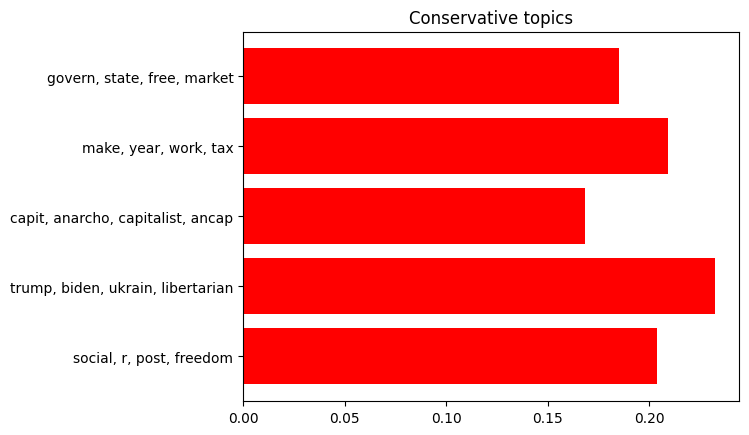

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = (topic_distros.mean().index)
y_pos = np.arange(len(people))
performance = topic_distros.mean().values

ax.barh(people, performance, align='center', color='r')
#ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_xlabel('Performanc')
ax.set_title('Conservative topics')

plt.show()

### Liberal LDA

In [ ]:
sanitized_liberal_df.shape

(8319, 2)

In [ ]:
sanitized_liberal_df = sanitized_liberal_df.reset_index()
sanitized_liberal_df = sanitized_liberal_df.drop(columns=['index'])

In [ ]:
splitted_by_word_posts = sanitized_liberal_df.clean_title.apply(str.split)
dictionary = Dictionary(splitted_by_word_posts)
dictionary.filter_extremes(no_below=60, no_above=0.3)
print(dictionary, flush=True)
print('')
ldacorpus = [dictionary.doc2bow(text) for text in splitted_by_word_posts]
tfidfmodel = TfidfModel(ldacorpus)
model_corpus = tfidfmodel[ldacorpus]

i = 10
print(f"tokens after preprocessing: {sanitized_conservative_df.clean_title.iloc[i]}")
print(f"Bow representation:{ldacorpus[i]}") 
print(f"tf-idf representation:{model_corpus[i]}")

Dictionary(536 unique tokens: ['class', 'human', 'matter', 'rememb', 'speak']...)

tokens after preprocessing: mexico declin impos econom sanction russia mexican presid critic character censorship russian state medium agre fact medium russia countri censor lopez obrador
Bow representation:[(38, 1), (39, 1), (40, 1)]
tf-idf representation:[(38, 0.47398674523898615), (39, 0.6865179504492711), (40, 0.5513888546649129)]


In [ ]:
num_topics = 5

# find chunksize to make about 500 updates
num_passes = 10
chunk_size = len(model_corpus) * num_passes/500
print(chunk_size)

start = time.time()
print("fitting model", flush=True)
model = LdaMulticore(num_topics=num_topics, # number of topics
                     corpus=model_corpus,   # what to train on 
                     id2word=dictionary,    # mapping from IDs to words
                     workers=min(10, multiprocessing.cpu_count()-1), # choose 10 cores, or whatever computer has
                     passes=num_passes,     # make this many passes over data
                     chunksize=chunk_size,  # update after this many instances
                     alpha=0.5
                    )
    
print("done in {}".format(time.time()-start), flush=True)

166.38
fitting model
done in 30.626681804656982


In [ ]:
topic_corpus = model[model_corpus]
model.print_topics()
topic_sep = re.compile(r"0\.[0-9]{3}\*") # getting rid of useless formatting
model_topics = [(topic_no, re.sub(topic_sep, '', model_topic).split(' + ')) for topic_no, model_topic in
                model.print_topics(num_topics=num_topics, num_words=10)]

descriptors = []
for i, m in model_topics:
    print(i+1, ", ".join(m[:10]))
    descriptors.append(", ".join(m[:4]).replace('"', ''))

1 "woman", "vote", "american", "right", "gop", "abort", "r", "life", "law", "gender"
2 "worker", "state", "unitedst", "opinion", "cuba", "capit", "support", "back", "democraci", "liber"
3 "trump", "biden", "year", "call", "world", "black", "kill", "show", "china", "chang"
4 "feminist", "democrat", "elect", "america", "anti", "republican", "white", "sex", "polic", "movement"
5 "communist", "social", "parti", "work", "communism", "time", "revolut", "make", "femin", "govern"


In [ ]:
scores = [[t[1] for t in topic_corpus[entry]] for entry in range(len(sanitized_conservative_df))]
topic_distros = pd.DataFrame(data=scores, columns=descriptors)
topic_distros

woman, vote, american, right  worker, state, unitedst, opinion  \
0                         0.366469                          0.155803   
1                         0.111775                          0.211266   
2                         0.112786                          0.457280   
3                         0.249201                          0.118277   
4                         0.200000                          0.200000   
...                            ...                               ...   
4530                      0.283430                          0.127985   
4531                      0.184348                          0.169486   
4532                      0.127864                          0.320509   
4533                      0.128697                          0.128698   
4534                      0.167338                          0.233662   

      trump, biden, year, call  feminist, democrat, elect, america  \
0                     0.164061                            0.170366   
1                     0.317909                            0.111776   
2                     0.112774                            0.204389   
3                     0.247558                            0.118278   
4                     0.200000                            0.200000   
...                        ...                                 ...   
4530                  0.326377                            0.128016   
4531                  0.177519                            0.200922   
4532                  0.127864                            0.127866   
4533                  0.128697                            0.343479   
4534                  0.179680                            0.073885   

      communist, social, parti, work  
0                           0.143301  
1                           0.247274  
2                           0.112772  
3                           0.266686  
4                           0.200000  
...                              ...  
4530                        0.134192  
4531                        0.267725  
4532                        0.295896  
4533                        0.270429  
4534                        0.345435  

[4535 rows x 5 columns]

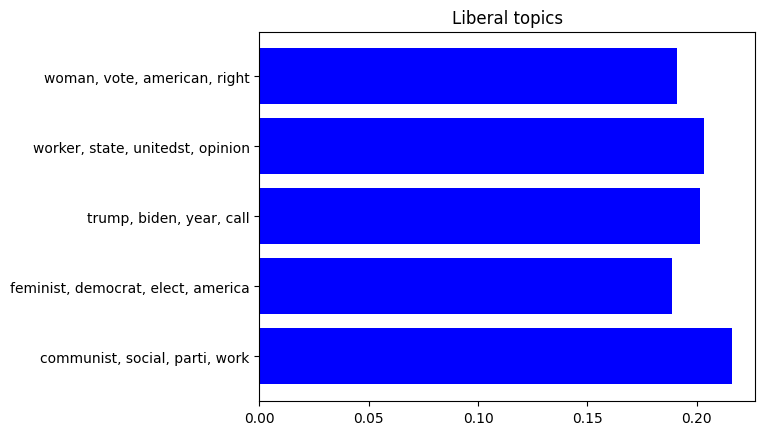

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(topic_distros.mean().index, topic_distros.mean().values, align='center', color='b')
ax.invert_yaxis() 
ax.set_title('Liberal topics')

plt.show()

# Text Classification

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt

In [ ]:
sanitized_df = pd.read_pickle('sanitized_df_stem_colloc.pkl')
sanitized_conservative_df = pd.read_pickle('sanitized_conservative_df_stem_coll.pkl')
sanitized_liberal_df = pd.read_pickle('sanitized_liberal_df_stem_coll.pkl')
sanitized_df

political_lean                                        clean_title
0            Liberal  matter languag speak wear rememb human sake hu...
1            Liberal       biden speech draw million unitedst tv viewer
2            Liberal        state union watch state union night opinion
3            Liberal                                    give poor money
4            Liberal                                                dew
...              ...                                                ...
12849   Conservative             ron paul spirit defens leak free inion
12850   Conservative  anarcho capit opinion doctrin system implement...
12851   Conservative  mi project dedic advanc austrian school econom...
12852   Conservative                fireman protect monopoli fail capit
12853   Conservative  articl written mi listen write murray rothbard...

[12854 rows x 2 columns]

In [ ]:
sanitized_df = pd.read_pickle('sanitized_df.pkl')
sanitized_conservative_df = pd.read_pickle('sanitized_conservative_df.pkl')
sanitized_liberal_df = pd.read_pickle('sanitized_liberal_df.pkl')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# transform labels into numbers
labels2numbers = LabelEncoder()

y = labels2numbers.fit_transform(sanitized_df['political_lean'])
print(sanitized_df['political_lean'][:10], y[:10], len(y))

0    Liberal
1    Liberal
2    Liberal
3    Liberal
4    Liberal
5    Liberal
6    Liberal
7    Liberal
8    Liberal
9    Liberal
Name: political_lean, dtype: object [1 1 1 1 1 1 1 1 1 1] 12854


In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), 
                                   stop_words='english', 
                                   analyzer='word', 
                                   min_df=0.001, 
                                   max_df=0.7, 
                                   sublinear_tf=True, 
                                   use_idf=True)      

X = tfidf_vectorizer.fit_transform(sanitized_df['clean_title'])
print(X.shape)

(12854, 3084)


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    #from itertools import izip
    pc.update_scalarmappable()
    #ax = pc.get_axes()
    ax = pc.axes# FOR LATEST MATPLOTLIB
    #Use zip BELOW IN PYTHON 3
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')
    add = '         avg / total       0.77      0.57      0.49       858'
    lines[5] = add
    lines.pop(7)
    lines.pop(6)

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)


def main():
    sampleClassificationReport = """             precision    recall  f1-score   support

          Acacia       0.62      1.00      0.76        66
          Blossom       0.93      0.93      0.93        40
          Camellia       0.59      0.97      0.73        67
          Daisy       0.47      0.92      0.62       272
          Echium       1.00      0.16      0.28       413

        avg / total       0.77      0.57      0.49       858"""


    plot_classification_report(sampleClassificationReport)
    plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
    plt.close()

#if __name__ == "__main__":
#    main()
    #cProfile.run('main()') # if you want to do some profiling

In [ ]:
most_frequent = DummyClassifier(strategy='most_frequent')

logreg = []
dummy_score = []

for k in [2,3,5,8,10]:
    cv = cross_val_score(LogisticRegression(), X, y=y, cv=k, scoring="f1_micro")
    logreg.append(cv.mean())
    dummy = cross_val_score(most_frequent, X, y=y, cv=k, n_jobs=-1, scoring="f1_micro")
    dummy_score.append(dummy.mean())


    print(f"F1 with {k} folds for LogReg is {cv.mean()} while for dummy is {dummy.mean()}")
    print()

F1 with 2 folds for LogReg is 0.6768321145168819 while for dummy is 0.6471915357087288

F1 with 3 folds for LogReg is 0.6863986045604551 while for dummy is 0.6471915435433865

F1 with 5 folds for LogReg is 0.7206309828118782 while for dummy is 0.6471915271654657

F1 with 8 folds for LogReg is 0.7311323688160685 while for dummy is 0.6471915464022981

F1 with 10 folds for LogReg is 0.7363445304415708 while for dummy is 0.6471916054970924



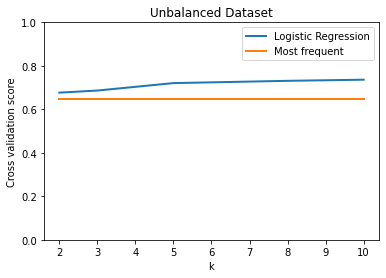

In [ ]:
plt.plot([2,3,5,8,10], logreg, label='Logistic Regression', linewidth=2)
plt.plot([2,3,5,8,10], dummy_score, label='Most frequent', linewidth=2)
plt.legend()
plt.ylabel('Cross validation score')
plt.xlabel('k')
plt.ylim((0,1))
plt.title('Unbalanced Dataset')
plt.show()

In [ ]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [ ]:
Counter(y)

Counter({0: 4535, 1: 8319})

In [ ]:
# undersampling
rus = RandomUnderSampler(random_state=42)
x_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({1: 8319, 0: 4535})
Resample dataset shape Counter({0: 4535, 1: 4535})


In [ ]:
y_rus

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
classifier = LogisticRegression()
%time classifier.fit(x_rus, y_rus)
print(classifier)

CPU times: user 148 ms, sys: 0 ns, total: 148 ms
Wall time: 220 ms
LogisticRegression()


In [ ]:
for k in [2,3,5,10]:
    cv = cross_val_score(LogisticRegression(), x_rus, y=y_rus, cv=k, scoring="f1_micro")
    fold_size = X.shape[0]/k
    
    print("F1 with {} folds for bag-of-words is {}".format(k, cv.mean()))
    print("Training on {} instances/fold, testing on {}".format(fold_size*(k-1), fold_size))
    print()

F1 with 2 folds for bag-of-words is 0.5882028665931642
Training on 6427.0 instances/fold, testing on 6427.0

F1 with 3 folds for bag-of-words is 0.6233736897192074
Training on 8569.333333333334 instances/fold, testing on 4284.666666666667

F1 with 5 folds for bag-of-words is 0.6929437706725469
Training on 10283.2 instances/fold, testing on 2570.8

F1 with 10 folds for bag-of-words is 0.7092613009922822
Training on 11568.6 instances/fold, testing on 1285.4



In [ ]:
most_frequent = DummyClassifier(strategy='most_frequent')
print(cross_val_score(most_frequent, x_rus, y=y_rus, cv=5, n_jobs=-1, scoring="f1_micro").mean())

0.5


In [ ]:
# oversampling
rus = RandomOverSampler(random_state=42)
x_ros, y_ros = rus.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_ros))

original dataset shape: Counter({1: 8319, 0: 4535})
Resample dataset shape Counter({1: 8319, 0: 8319})


In [ ]:
classifier = LogisticRegression()
%time classifier.fit(x_ros, y_ros)

CPU times: user 354 ms, sys: 3.78 ms, total: 358 ms
Wall time: 386 ms


LogisticRegression()

In [ ]:
most_frequent = DummyClassifier(strategy='most_frequent')

for k in [2,3,5,10]:
    cv = cross_val_score(LogisticRegression(), x_ros, y=y_ros, cv=k, scoring="f1_micro")
    dummy = cross_val_score(most_frequent, x_ros, y=y_ros, cv=k, n_jobs=-1, scoring="f1_micro")

    print(f"F1 with {k} folds for LogReg is {cv.mean()} while for dummy is {dummy.mean()}")
    print()

F1 with 2 folds for LogReg is 0.7455222983531674 while for dummy is 0.4999398966221902

F1 with 3 folds for LogReg is 0.7506310854670032 while for dummy is 0.5

F1 with 5 folds for LogReg is 0.7644596548345703 while for dummy is 0.49993988578298765

F1 with 10 folds for LogReg is 0.7689687022989038 while for dummy is 0.4999398677089598



In [ ]:
most_frequent = DummyClassifier(strategy='most_frequent')

print(cross_val_score(most_frequent, X, y=y, cv=5, n_jobs=-1, scoring="f1_micro").mean())

In [ ]:
# SMOTE
from imblearn.over_sampling import SMOTE 

print(Counter(y))
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)
print(Counter(y_sm))

Counter({1: 8319, 0: 4535})
Counter({1: 8319, 0: 8319})


In [ ]:
filename = "X_SMOTE.pkl"
with open(filename, "wb") as f:
  pickle.dump(X_sm, f)

In [ ]:
with open(filename, "rb") as f:
  test = pickle.load(f)

In [ ]:
filename = "y_SMOTE.pkl"
with open(filename, "wb") as f:
  pickle.dump(y_sm, f)

In [ ]:
def save_data(filename, data):
  with open(filename, "wb") as f:
    pickle.dump(data, f)

In [ ]:
most_frequent = DummyClassifier(strategy='most_frequent')

logreg = []
dummy_score = []

for k in [2,3,5,8,10]:
    cv = cross_val_score(LogisticRegression(), X_sm, y=y_sm, cv=k, scoring="f1_micro")
    logreg.append(cv.mean())
    dummy = cross_val_score(most_frequent, X_sm, y=y_sm, cv=k, n_jobs=-1, scoring="f1_micro")
    dummy_score.append(dummy.mean())
    

    print(f"F1 with {k} folds for LogReg is {cv.mean()} while for dummy is {dummy.mean()}")
    print()

F1 with 2 folds for LogReg is 0.6796489962735905 while for dummy is 0.4999398966221902

F1 with 3 folds for LogReg is 0.7286332491886043 while for dummy is 0.5

F1 with 5 folds for LogReg is 0.7541249588159811 while for dummy is 0.49993988578298765

F1 with 8 folds for LogReg is 0.7589935527435527 while for dummy is 0.4999398749398749

F1 with 10 folds for LogReg is 0.7610375277533652 while for dummy is 0.4999398677089598



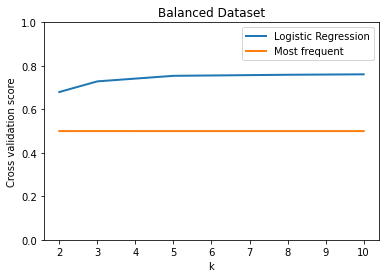

In [ ]:
plt.plot([2,3,5,8,10], logreg, label='Logistic Regression', linewidth=2)
plt.plot([2,3,5,8,10], dummy_score, label='Most frequent', linewidth=2)
plt.legend()
plt.ylabel('Cross validation score')
plt.xlabel('k')
plt.ylim((0,1))
plt.title('Balanced Dataset')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.33, random_state=42)

In [ ]:
save_data("X_train_SMOTE.pkl", X_train)
save_data("X_test_SMOTE.pkl", X_test)
save_data("y_train_SMOTE.pkl", y_train)
save_data("y_test_SMOTE.pkl", y_test)

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predicted_y = classifier.predict(X_test)
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78      2726
           1       0.81      0.73      0.76      2765

    accuracy                           0.77      5491
   macro avg       0.78      0.77      0.77      5491
weighted avg       0.78      0.77      0.77      5491



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    #from itertools import izip
    pc.update_scalarmappable()
    #ax = pc.get_axes()
    ax = pc.axes# FOR LATEST MATPLOTLIB
    #Use zip BELOW IN PYTHON 3
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')
    add = '         avg / total       0.77      0.57      0.49       858'
    lines[5] = add
    lines.pop(7)
    lines.pop(6)

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)


def main():
    sampleClassificationReport = """             precision    recall  f1-score   support

          Acacia       0.62      1.00      0.76        66
          Blossom       0.93      0.93      0.93        40
          Camellia       0.59      0.97      0.73        67
          Daisy       0.47      0.92      0.62       272
          Echium       1.00      0.16      0.28       413

        avg / total       0.77      0.57      0.49       858"""


    plot_classification_report(sampleClassificationReport)
    plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
    plt.close()

#if __name__ == "__main__":
#    main()
    #cProfile.run('main()') # if you want to do some profiling

In [ ]:
classification_report(y_test, predicted_y)

'              precision    recall  f1-score   support\n\n           0       0.74      0.82      0.78      2726\n           1       0.80      0.71      0.76      2765\n\n    accuracy                           0.77      5491\n   macro avg       0.77      0.77      0.77      5491\nweighted avg       0.77      0.77      0.77      5491\n'

In [ ]:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      2726
           1       0.80      0.71      0.76      2765

    accuracy                           0.77      5491
   macro avg       0.77      0.77      0.77      5491
weighted avg       0.77      0.77      0.77      5491'


SyntaxError: ignored

In [ ]:
pretty_text = """              precision    recall  f1-score   support

Conservative       0.74      0.82      0.78      2726
     Liberal       0.80      0.71      0.76      2765

    accuracy                           0.77      5491
   macro avg       0.77      0.77      0.77      5491
weighted avg       0.77      0.77      0.77      549"""


In [ ]:
lines = pretty_text.split("\n")

In [ ]:
lines[8]

IndexError: ignored

In [ ]:
lines

['              precision    recall  f1-score   support',
 '',
 'Conservative       0.74      0.82      0.78      2726',
 '     Liberal       0.80      0.71      0.76      2765',
 '',
 '    accuracy                           0.77      5491',
 '   macro avg       0.77      0.77      0.77      5491',
 'weighted avg       0.77      0.77      0.77      549']

In [ ]:
"""             precision    recall  f1-score   support

          Acacia       0.62      1.00      0.76        66
          Blossom       0.93      0.93      0.93        40
          Camellia       0.59      0.97      0.73        67
          Daisy       0.47      0.92      0.62       272
          Echium       1.00      0.16      0.28       413

        avg / total       0.77      0.57      0.49       858"""

[0.74, 0.82, 0.78]
[0.8, 0.71, 0.76]
plotMat: [[0.74, 0.82, 0.78], [0.8, 0.71, 0.76]]
support: [2726, 2765]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.


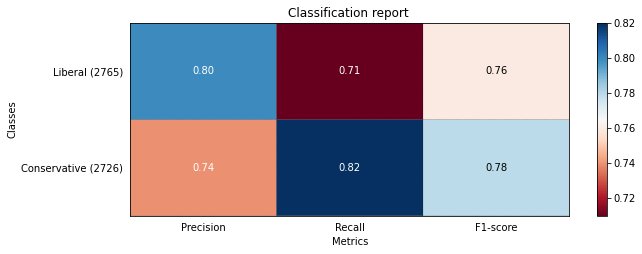

In [ ]:
plot_classification_report(pretty_text)

In [ ]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78      2726
           1       0.80      0.71      0.76      2765

    accuracy                           0.77      5491
   macro avg       0.77      0.77      0.77      5491
weighted avg       0.77      0.77      0.77      5491



In [ ]:
text = classification_report(y_test, predicted_y)

In [ ]:
print(text)

              precision    recall  f1-score   support

           0       0.74      0.82      0.78      2726
           1       0.80      0.71      0.76      2765

    accuracy                           0.77      5491
   macro avg       0.77      0.77      0.77      5491
weighted avg       0.77      0.77      0.77      5491



In [ ]:
lines = text.split('\n')
lines

['              precision    recall  f1-score   support',
 '',
 '           0       0.74      0.82      0.78      2726',
 '           1       0.80      0.71      0.76      2765',
 '',
 '    accuracy                           0.77      5491',
 '   macro avg       0.77      0.77      0.77      5491',
 'weighted avg       0.77      0.77      0.77      5491',
 '']

In [ ]:
lines.pop(8)
lines.pop(7)
lines.pop(6)

'   macro avg       0.77      0.77      0.77      5491'

In [ ]:
lines

['              precision    recall  f1-score   support',
 '',
 '           0       0.74      0.82      0.78      2726',
 '           1       0.80      0.71      0.76      2765',
 '',
 '    accuracy                           0.77      5491']

In [ ]:
lines[5] = testlines[-1]

'    accuracy                           0.77      5491'

In [ ]:
sampleClassificationReport = """             precision    recall  f1-score   support

          Acacia       0.62      1.00      0.76        66
          Blossom       0.93      0.93      0.93        40
          Camellia       0.59      0.97      0.73        67
          Daisy       0.47      0.92      0.62       272
          Echium       1.00      0.16      0.28       413

        avg / total       0.77      0.57      0.49       858"""

testlines = sampleClassificationReport.split('\n')
testlines

['             precision    recall  f1-score   support',
 '',
 '          Acacia       0.62      1.00      0.76        66',
 '          Blossom       0.93      0.93      0.93        40',
 '          Camellia       0.59      0.97      0.73        67',
 '          Daisy       0.47      0.92      0.62       272',
 '          Echium       1.00      0.16      0.28       413',
 '',
 '        avg / total       0.77      0.57      0.49       858']

In [ ]:
testlines[-1]

'        avg / total       0.77      0.57      0.49       858'

In [ ]:
test ='         avg / total       0.77      0.57      0.49       858'
test

'         avg / total       0.77      0.57      0.49       858'

regularization

In [ ]:
from sklearn.metrics import f1_score

best_c = None
best_f1_score = 0.0

for c in [50, 20, 10, 1.0, 0.5, 0.1, 0.05, 0.01]:
    clf = LogisticRegression(C=c, n_jobs=-1)
    cv_reg = cross_val_score(clf, X_sm, y=y_sm, cv=5, n_jobs=-1, scoring="f1_micro").mean()

    print("5-CV on train at C={}: {}".format(c, cv_reg.mean()))
    print()

    if cv_reg > best_f1_score:
        best_f1_score = cv_reg
        best_c = c
        
print("best C parameter: {}".format(best_c))

5-CV on train at C=50: 0.7577917092957389

5-CV on train at C=20: 0.7597150029768097

5-CV on train at C=10: 0.7601958625234099

5-CV on train at C=1.0: 0.7553871586784121

5-CV on train at C=0.5: 0.7471527573061894

5-CV on train at C=0.1: 0.7273172513352293

5-CV on train at C=0.05: 0.7104270529872141

5-CV on train at C=0.01: 0.6819956655626459

best C parameter: 10


In [ ]:
reg_clf = LogisticRegression(C=best_c, n_jobs=-1)
reg_clf.fit(X_train, y_train)
reg_preds = reg_clf.predict(X_test)

print(classification_report(y_test, reg_preds))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79      2726
           1       0.82      0.71      0.76      2765

    accuracy                           0.78      5491
   macro avg       0.78      0.78      0.77      5491
weighted avg       0.78      0.78      0.77      5491



In [ ]:
classification_report(y_test, reg_preds)

'              precision    recall  f1-score   support\n\n           0       0.74      0.84      0.79      2726\n           1       0.82      0.71      0.76      2765\n\n    accuracy                           0.78      5491\n   macro avg       0.78      0.78      0.77      5491\nweighted avg       0.78      0.78      0.77      5491\n'

In [ ]:
pretty_text = """              precision    recall  f1-score   support

           Conservative       0.74      0.84      0.79      2726
           Liberal       0.82      0.71      0.76      2765

    accuracy                           0.78      5491
   macro avg       0.78      0.78      0.77      5491
weighted avg       0.78      0.78      0.77      5491"""


[0.74, 0.84, 0.79]
[0.82, 0.71, 0.76]
plotMat: [[0.74, 0.84, 0.79], [0.82, 0.71, 0.76]]
support: [2726, 2765]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.


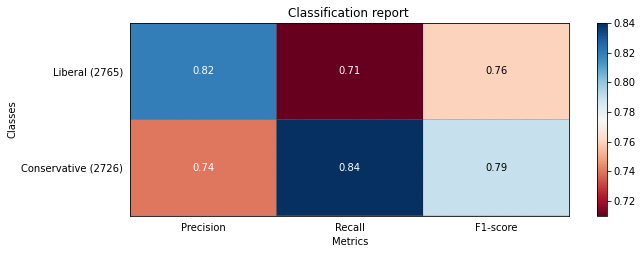

In [ ]:
plot_classification_report(pretty_text)

Feature selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k=1500).fit(X_sm, y_sm)
X_sel = selector.transform(X_sm)
print(X_sel.shape)

(16638, 1500)


In [ ]:
clf = LogisticRegression(C=best_c, n_jobs=-1)

cv_reg = cross_val_score(clf, X_sel, y=y_sm, cv=5, n_jobs=-1, scoring="f1_micro")
print("5-CV on train: {}".format(cv_reg.mean()))

5-CV on train: 0.7743788077154286


In [ ]:
selector = SelectKBest(chi2, k=1500).fit(X_train, y_train)
X_sel = selector.transform(X_train)
print(X_sel.shape)

(11147, 1500)


In [ ]:
clf = LogisticRegression(C=best_c, n_jobs=-1)
clf.fit(X_sel, y_train)

LogisticRegression(C=10, n_jobs=-1)

In [ ]:
new_X_sel = selector.transform(X_test)
print(new_X_sel.shape)

(5491, 1500)


In [ ]:
new_predictions_regularized = clf.predict(new_X_sel)

In [ ]:
classification_report(y_test, new_predictions_regularized)

'              precision    recall  f1-score   support\n\n           0       0.73      0.83      0.78      2726\n           1       0.81      0.70      0.75      2765\n\n    accuracy                           0.76      5491\n   macro avg       0.77      0.76      0.76      5491\nweighted avg       0.77      0.76      0.76      5491\n'

In [ ]:
pretty_text="""              precision    recall  f1-score   support

           Conservative       0.73      0.83      0.78      2726
           Liberal       0.81      0.70      0.75      2765

    accuracy                           0.76      5491
   macro avg       0.77      0.76      0.76      5491
weighted avg       0.77      0.76      0.76      5491"""


[0.73, 0.83, 0.78]
[0.81, 0.7, 0.75]
plotMat: [[0.73, 0.83, 0.78], [0.81, 0.7, 0.75]]
support: [2726, 2765]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.


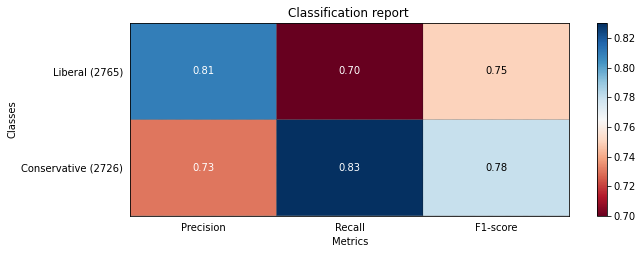

In [ ]:
plot_classification_report(pretty_text)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, new_predictions_regularized), display_labels=['Conservative', 'Liberal'], cmap=)

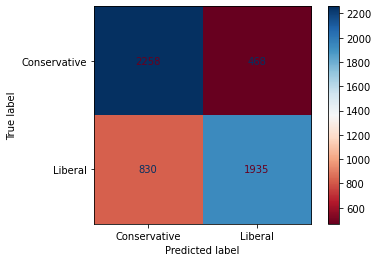

In [ ]:
cm.plot(cmap='RdBu')

## Neural Networks

In [ ]:
import pickle

with open("X_SMOTE.pkl", "rb") as f:
  X_sm = pickle.load(f)

with open("y_SMOTE.pkl", "rb") as f:
  y_sm = pickle.load(f)

with open("X_train_SMOTE.pkl", "rb") as f:
  X_train = pickle.load(f)

with open("X_test_SMOTE.pkl", "rb") as f:
  X_test = pickle.load(f)

with open("y_train_SMOTE.pkl", "rb") as f:
  y_train = pickle.load(f)

with open("y_test_SMOTE.pkl", "rb") as f:
  y_test = pickle.load(f)

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

In [ ]:
print(X_train.shape)
print(y_train.shape)

(11147, 3596)
(11147,)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder()
labels = encoder.fit_transform(y_train.reshape(-1,1))

In [ ]:
y_train = labels.toarray()
y_test = encoder.transform(y_test.reshape(-1,1)).toarray()

In [ ]:
nparray = X_train.toarray()

In [ ]:
nparray[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
X_train_arr = X_train.toarray()
X_test_arr = X_test.toarray()
# y_test and train already are nparray

In [ ]:
X_train_tensor = torch.tensor(X_train_arr, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_arr, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
class myDataset(Dataset):
  def __init__(self, X, Y):
    self.X = X
    self.Y = Y
    if len(self.X) != len(self.Y):
      raise Exception("The length of X does not match the length of Y")

  def __len__(self):
    return len(self.X)

  def __getitem__(self, index):
    _x = self.X[index]
    _y = self.Y[index]

    return _x, _y

In [ ]:
trainDataset = myDataset(X_train_tensor, y_train_tensor)
testDataset = myDataset(X_test_tensor, y_test_tensor)

In [ ]:
trainLoader = DataLoader(trainDataset, batch_size=64, shuffle=True)
testLoader = DataLoader(testDataset, batch_size=64, shuffle=True)

In [ ]:
train_features, train_labels = next(iter(trainLoader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([64, 3596])
Labels batch shape: torch.Size([64, 2])


In [ ]:
class MLP(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(3596, 2048),
            torch.nn.ReLU(),
            torch.nn.BatchNorm1d(2048),

            torch.nn.Linear(2048, 1024),
            torch.nn.ReLU(),
            torch.nn.BatchNorm1d(1024),

            torch.nn.Linear(1024, 512),
            torch.nn.ReLU(),
            torch.nn.BatchNorm1d(512),

            torch.nn.Linear(512, 128),
            torch.nn.ReLU(),
            torch.nn.BatchNorm1d(128),

            torch.nn.Linear(128, 32),
            torch.nn.ReLU(),
            torch.nn.BatchNorm1d(32),
            
            torch.nn.Linear(32, 2),
            torch.nn.Softmax(dim=1),
        )

    def forward(self, X): 
        return self.layers(X)

In [ ]:
model = MLP()

In [ ]:
print(model)

MLP(
  (layers): Sequential(
    (0): Linear(in_features=3596, out_features=2048, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=2048, out_features=1024, bias=True)
    (4): ReLU()
    (5): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=1024, out_features=512, bias=True)
    (7): ReLU()
    (8): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Linear(in_features=512, out_features=128, bias=True)
    (10): ReLU()
    (11): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): Linear(in_features=128, out_features=32, bias=True)
    (13): ReLU()
    (14): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): Linear(in_features=32, out_features=2, bias=True)
    (16): Softmax(dim=1)
  )
)


In [ ]:
class AverageMeter(object):
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [ ]:
def accuracy(y_hat, y):
    classes_prediction = y_hat.argmax(dim=1)
    ground_truth = y.argmax(dim=1)
    match_ground_truth = classes_prediction == y 
    correct_matches = match_ground_truth.sum()
    return (correct_matches / y_hat.shape[0]).item() 

In [ ]:
def train_epoch(model, dataloader, loss_fn, optimizer, loss_meter): #accuracy_meter
    for X, y in dataloader:
        optimizer.zero_grad()
        y_hat = model(X)
        loss = loss_fn(y_hat, y)
        loss.backward()
        optimizer.step()
        #acc = accuracy(y_hat, y)
        loss_meter.update(val=loss.item(), n=X.shape[0])
        #accuracy_meter.update(val=acc, n=X.shape[0])

def train_model(model, dataloader, loss_fn, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        loss_meter = AverageMeter()
        #accuracy_meter = AverageMeter()
        train_epoch(model, dataloader, loss_fn, optimizer, loss_meter) #accuracy_meter
        print(f"Epoch {epoch+1} completed. Loss - total: {loss_meter.sum} - average: {loss_meter.avg}") #; Accuracy: {accuracy_meter.avg}")
    return loss_meter.sum #accuracy_meter.avg

In [ ]:
model = MLP()
num_epochs = 10
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
loss_fn = torch.nn.BCELoss()

loss = train_model(model, trainLoader, loss_fn, optimizer, num_epochs)
#print(f"Training completed - final accuracy {acc} and loss {loss}")

Epoch 1 completed. Loss - total: 6251.1193834245205 - average: 0.560789394763122
Epoch 2 completed. Loss - total: 4200.538630396128 - average: 0.37683131159918615
Epoch 3 completed. Loss - total: 3063.4924039542675 - average: 0.27482662635276467
Epoch 4 completed. Loss - total: 2374.331051528454 - average: 0.21300179882734852
Epoch 5 completed. Loss - total: 2053.579266279936 - average: 0.18422708049519473
Epoch 6 completed. Loss - total: 1679.6682592444122 - average: 0.15068343583425245
Epoch 7 completed. Loss - total: 1396.9116778671741 - average: 0.1253172762059006
Epoch 8 completed. Loss - total: 1230.4358541965485 - average: 0.11038269078644913
Epoch 9 completed. Loss - total: 1148.1383909871802 - average: 0.10299976594484436
Epoch 10 completed. Loss - total: 978.2699742913246 - average: 0.08776083020465816


NameError: ignored

In [ ]:
train_features, train_labels = next(iter(trainLoader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([64, 3596])
Labels batch shape: torch.Size([64, 2])


In [ ]:
out = model(train_features)
print(out.shape)
print(train_labels.shape)
train_labels

In [ ]:
def my_accuracy(y_hat, y):
    classes_prediction = y_hat.argmax(dim=1)
    ground_truth = y.argmax(dim=1)
    match_ground_truth = classes_prediction == ground_truth 
    correct_matches = match_ground_truth.sum()
    return (correct_matches / y_hat.shape[0]).item() 

In [ ]:
classes_prediction = out.argmax(dim=1)
print(classes_prediction.shape)
print(classes_prediction)
classes_prediction == train_labels.argmax(dim=1)

torch.Size([64])
tensor([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1])


tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True,  True, False,
         True,  True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False,  True,  True,  True, False,  True,
         True,  True,  True,  True])

In [ ]:
f1_score(train_labels.argmax(dim=1), classes_prediction)

0.912280701754386

In [ ]:
print(classification_report(train_labels.argmax(dim=1), classes_prediction))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        34
           1       0.96      0.87      0.91        30

    accuracy                           0.92        64
   macro avg       0.93      0.92      0.92        64
weighted avg       0.93      0.92      0.92        64



In [ ]:
report = classification_report(train_labels.argmax(dim=1), classes_prediction, output_dict=True)

In [ ]:
report['0']

{'f1-score': 0.9295774647887325,
 'precision': 0.8918918918918919,
 'recall': 0.9705882352941176,
 'support': 34}

In [ ]:
confusion_matrix(train_labels.argmax(dim=1), classes_prediction)

array([33,  1])

In [ ]:
class AverageMeter(object):
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [ ]:
def test_model(model, dataloader):
    f1_con = []
    recall_con = []
    precision_con = []
    f1_lib = []
    recall_lib = []
    precision_lib = []
    conf_matrix = []

    model.eval() 
    with torch.no_grad():
        for X, y in dataloader:
            y_hat = model(X)
            classes_prediction = y_hat.argmax(dim=1)
            ground_truth = y.argmax(dim=1)
            report = classification_report(ground_truth, classes_prediction, output_dict=True)
            conf_matrix.append(confusion_matrix(ground_truth, classes_prediction))
            f1_lib.append(report['1']['f1-score'])
            precision_lib.append(report['1']['precision'])
            recall_lib.append(report['1']['recall'])
            f1_con.append(report['0']['f1-score'])
            precision_con.append(report['0']['precision'])
            recall_con.append(report['0']['recall'])

    np.mean(f1_con)


    return (np.mean(f1_con), np.mean(recall_con), np.mean(precision_con), np.mean(f1_lib), np.mean(recall_lib), np.mean(precision_lib), conf_matrix)

In [ ]:
f1_con, recall_con, precision_con, f1_lib, recall_lib, precision_lib, conf_matrix = test_model(model, testLoader)

In [ ]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

In [ ]:
import pandas as pd

In [ ]:
uniform_data = np.array([f1_con, recall_con, precision_con, f1_lib, recall_lib, precision_lib])

df = pd.DataFrame(uniform_data.reshape(2,3), index = ['Conservative', 'Liberal'], columns=['F1-score', 'Recall', 'Precision'])
df

F1-score    Recall  Precision
Conservative  0.806511  0.851914   0.769381
Liberal       0.788800  0.748996   0.838309

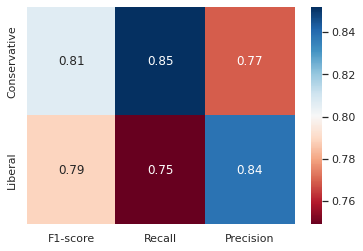

In [ ]:
ax = sns.heatmap(df, annot=True, fmt=".2f", cmap="RdBu")

In [ ]:
len(conf_matrix)

86

In [ ]:
conf_matrix[0]

array([[29, 10],
       [ 8, 17]])

In [ ]:
conf_matrix[0][0][0]

29

In [ ]:
conf_matrix[0][1][1]

17

In [ ]:
elem11 = 0
elem12 = 0
elem21 = 0
elem22 = 0
n = len(conf_matrix)
for i in range(n):
    elem11 += conf_matrix[i][0][0]
    elem12 += conf_matrix[i][0][1]
    elem21 += conf_matrix[i][1][0]
    elem22 += conf_matrix[i][1][1]

confusion_matrix = np.array([[elem11, elem12], [elem21, elem22]])

In [ ]:
confusion_matrix

array([[2326,  400],
       [ 695, 2070]])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

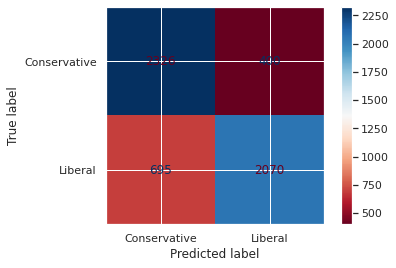

In [ ]:
cm = ConfusionMatrixDisplay(confusion_matrix, display_labels=['Conservative', 'Liberal'])
cm.plot(cmap='RdBu')

# Sentiment analysis

In [ ]:
df = pd.read_csv("liberalsVSconservatives.csv")
df.head()

Title Political Lean  Score  \
0  No matter who someone is, how they look like, ...        Liberal      1   
1    Biden speech draws 38.2 million U.S. TV viewers        Liberal      6   
2                                 State of the union        Liberal      1   
3              We Should Just Give Poor People Money        Liberal      7   
4                                  Do it for the Dew        Liberal      6   

       Id            Subreddit  \
0  t5fybt            socialism   
1  t5fqdn            democrats   
2  t5fj9a  DemocraticSocialism   
3  t5f7n9      SocialDemocracy   
4  t5es2c            democrats   

                                                 URL  Num of Comments  \
0                    https://v.redd.it/ng5fyl7hp2l81                0   
1  https://www.reuters.com/world/us/biden-speech-...                1   
2  https://www.reddit.com/r/DemocraticSocialism/c...                1   
3                       https://youtu.be/a80kRjpubG0                3   
4                https://i.redd.it/drmunn90f2l81.jpg                1   

                                                Text  Date Created  
0                                                NaN  1.646272e+09  
1                                                NaN  1.646271e+09  
2  Who watched the state of the union last night ...  1.646270e+09  
3                                                NaN  1.646270e+09  
4                                                NaN  1.646268e+09

In [ ]:
df['title'].to_list()

['No matter who someone is, how they look like, what language they speak, what they wear, remember the human. For the sake of humanity, the working class can and must unite across all arbitrary boundaries. ',
 'Biden speech draws 38.2 million U.S. TV viewers ',
 'State of the union Who watched the state of the union last night and what was your opinion?',
 'We Should Just Give Poor People Money ',
 'Do it for the Dew ',
 'Proposed Bill Would Allow Kids With Contagious Diseases To Attend Schools ',
 "3 House Republicans voted against a bipartisan resolution to stand 'steadfastly' with the Ukrainian people ",
 "If you're bombing civilian targets, you're the bad guy. ",
 'Every city have to government their resources and give best quality producen to a country environment. And stop financing Political partis which cost 100x govermant spending. ',
 'Workers Behind First Union Push at an Amazon Retail Store Want $25/hr ',
 'Religion have a lot of sticks to grow, capitalism just Association.

In [ ]:
df = df[['Title', 'Political Lean', 'Subreddit', 'Text']]
df['Text'].fillna('', inplace = True)
df['Title'] = df.Title + " " + df.Text
df.drop('Text', 1, inplace = True)
df.rename(columns = {'Political Lean': 'political_lean', 'Title': 'title', 'Subreddit': 'subreddit'}, inplace = True)
df = df.drop(columns = ['subreddit'])
print(df.isna().sum())
df.head()

title             0
political_lean    0
dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


title political_lean
0  No matter who someone is, how they look like, ...        Liberal
1   Biden speech draws 38.2 million U.S. TV viewers         Liberal
2  State of the union Who watched the state of th...        Liberal
3             We Should Just Give Poor People Money         Liberal
4                                 Do it for the Dew         Liberal

In [ ]:
!pip install transformers
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
import torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 4.6 MB/s 
     |████████████████████████████████| 596 kB 40.6 MB/s 
     |████████████████████████████████| 101 kB 8.0 MB/s 
     |████████████████████████████████| 6.6 MB 26.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

In [ ]:
df['title'] = df['title'].apply(preprocess)

In [ ]:
conservative_df = df[df['political_lean']=='Conservative']
liberal_df = df[df['political_lean']=='Liberal']

In [ ]:
conservative_df = conservative_df.reset_index(drop=True)
conservative_df.head()

title political_lean
0      Russia receives Venezuela's 'strong support'    Conservative
1  SOTU Rebuttal: Rashida Tlaib Calls Biden Out f...   Conservative
2  [BREAKING] Pfizer vaccine data released. 1291 ...   Conservative
3  Biden's first State of the Union address in 67...   Conservative
4  'The Crime Was Too Serious': Hunter Biden Asso...   Conservative

In [ ]:
liberal_df.head()

title political_lean
0  No matter who someone is, how they look like, ...        Liberal
1   Biden speech draws 38.2 million U.S. TV viewers         Liberal
2  State of the union Who watched the state of th...        Liberal
3             We Should Just Give Poor People Money         Liberal
4                                 Do it for the Dew         Liberal

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/929 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def sentiment_analysis(dataframe):
  positive = 0
  negative = 0
  neutral = 0
  counter = 0
  n = len(dataframe)
  for i in range(n):
    if i%500 == 0 :
      print(i)
    text = df['title'][i]
    encoded_input = tokenizer(text, return_tensors='pt')
    try:
      output = model(**encoded_input)
    except RuntimeError:
      continue
    else:
      counter += 1
      output = model(**encoded_input)
      scores = output[0][0].detach().numpy()
      scores = softmax(scores)
      label = config.id2label[np.argmax(scores)]
      if label == 'Negative':
        negative += 1
      elif label == 'Neutral':
        neutral += 1
      elif label == 'Positive':
        positive += 1
      else:
        raise Exception("Non-identified label")

  return (positive, negative, neutral)    

In [ ]:
positive, negative, neutral = sentiment_analysis(liberal_df[:5000])

0
500
1000
1500
2000
2500
3000
3500
4000
4500


Negative: 35.42857142857142  Neutral: 57.61224489795919   Positive: 6.959183673469388


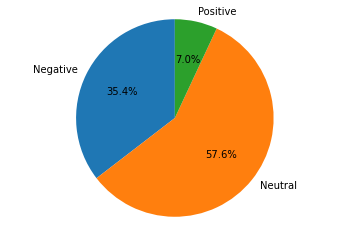

In [ ]:
labels= ['Negative', 'Neutral', 'Positive']
colors=['red', 'green', 'orange']
tot = positive + negative + neutral
print(f"Negative: {(negative/tot)*100}  Neutral: {(neutral/tot)*100}   Positive: {(positive/tot)*100}")
counts= [negative, neutral, positive]
plt.pie(counts, labels=labels, startangle=90, autopct='%1.1f%%') # colors=colors
plt.axis('equal')
plt.show()

In [ ]:
positive, negative, neutral = sentiment_analysis(conservative_df)

0
500
1000
1500
2000
2500
3000
3500
4000
4500


Negative: 34.23137876386688  Neutral: 57.91261036902875   Positive: 7.85601086710437


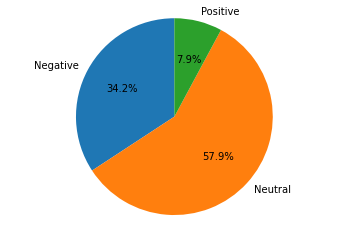

In [ ]:
import matplotlib.pyplot as plt

labels= ['Negative', 'Neutral', 'Positive']
colors=['red', 'green', 'orange']
tot = positive + negative + neutral
print(f"Negative: {(negative/tot)*100}  Neutral: {(neutral/tot)*100}   Positive: {(positive/tot)*100}")
counts= [negative, neutral, positive]
plt.pie(counts, labels=labels, startangle=90, autopct='%1.1f%%') # colors=colors
plt.axis('equal')
plt.show()

Alternative model

In [ ]:
config.id2label[2]

'Positive'

In [ ]:
len(conservative_df)

4535

In [ ]:
# test
text = df['title'][0]
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


1) Neutral 0.6604
2) Positive 0.2752
3) Negative 0.0644


In [ ]:
encoded_input

{'input_ids': tensor([[    0,  3084,   948,    54,   951,    16,     6,   141,    51,   356,
           101,     6,    99,  2777,    51,  1994,     6,    99,    51,  3568,
             6,  2145,     5,  1050,     4,   286,     5, 12253,     9,  9187,
             6,     5,   447,  1380,    64,     8,   531, 17013,   420,    70,
         23501, 10156,     4,  1437,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
# Print labels and scores
ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = config.id2label[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

In [ ]:
scores

array([0.06438702, 0.66039723, 0.27521572], dtype=float32)

In [ ]:
np.argmax(scores)

1

In [ ]:
config.id2label[np.argmax(scores)]

'Neutral'

In [ ]:
ranking = np.argsort(scores)
ranking

array([0, 2, 1])

In [ ]:
ranking = ranking[::-1]

In [ ]:
ranking

array([1, 2, 0])